In [572]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [2]:
input_data=pd.read_csv("./Dataset.csv")
input_data.head(2)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_32008\3051092476.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  input_data=pd.read_csv("./Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0


In [3]:
input_data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [4]:
input_data.shape

(121856, 40)

In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

# Data Cleaning & Formatting 

In [6]:
# input_data.iloc[1586]

In [7]:
#Replaced Special Charachter with NAN
# Convert columns those are numeric but in object class means showing as categorical.
special_char_pattern = r'[^a-zA-Z0-9\s\.\-]'

input_data = input_data.replace(special_char_pattern, np.nan, regex=True)


column_to_numeric=["Client_Income","Loan_Annuity","Population_Region_Relative","Age_Days","Employed_Days","Registration_Days",
                  "ID_Days","Score_Source_3","Credit_Amount"]
input_data[column_to_numeric] = input_data[column_to_numeric].apply(pd.to_numeric,errors='coerce')

In [8]:
# input_data.info()

In [9]:
# Seprate Categorical columns and Numerical Columns and Cetegorical but in number form
categorical_cols = input_data.select_dtypes(include=['object', 'category']).columns.tolist()
categoricla_num_column=["Car_Owned","Bike_Owned","Active_Loan","House_Own","Child_Count","Own_House_Age","Mobile_Tag",
                        "Homephone_Tag","Workphone_Working","Client_Family_Members","Cleint_City_Rating","Application_Process_Day",
                       "Application_Process_Hour","Credit_Bureau"]
numerical_cols = input_data.select_dtypes(include=['number']).columns.tolist()
numerical_cols=list(set(numerical_cols)-set(categoricla_num_column))
print(categorical_cols)
print("#"*100)
numerical_cols.remove("ID")
numerical_cols.remove("Default")
print(numerical_cols)
print("#"*100)
print(categoricla_num_column)

['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']
####################################################################################################
['Loan_Annuity', 'Score_Source_3', 'ID_Days', 'Phone_Change', 'Score_Source_1', 'Credit_Amount', 'Social_Circle_Default', 'Score_Source_2', 'Employed_Days', 'Registration_Days', 'Age_Days', 'Client_Income', 'Population_Region_Relative']
####################################################################################################
['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Credit_Bureau']


# Outlier Analysis

In [10]:
all_numerical_col_data=[]
all_numerical_col_data.extend(categoricla_num_column)
all_numerical_col_data.extend(numerical_cols)

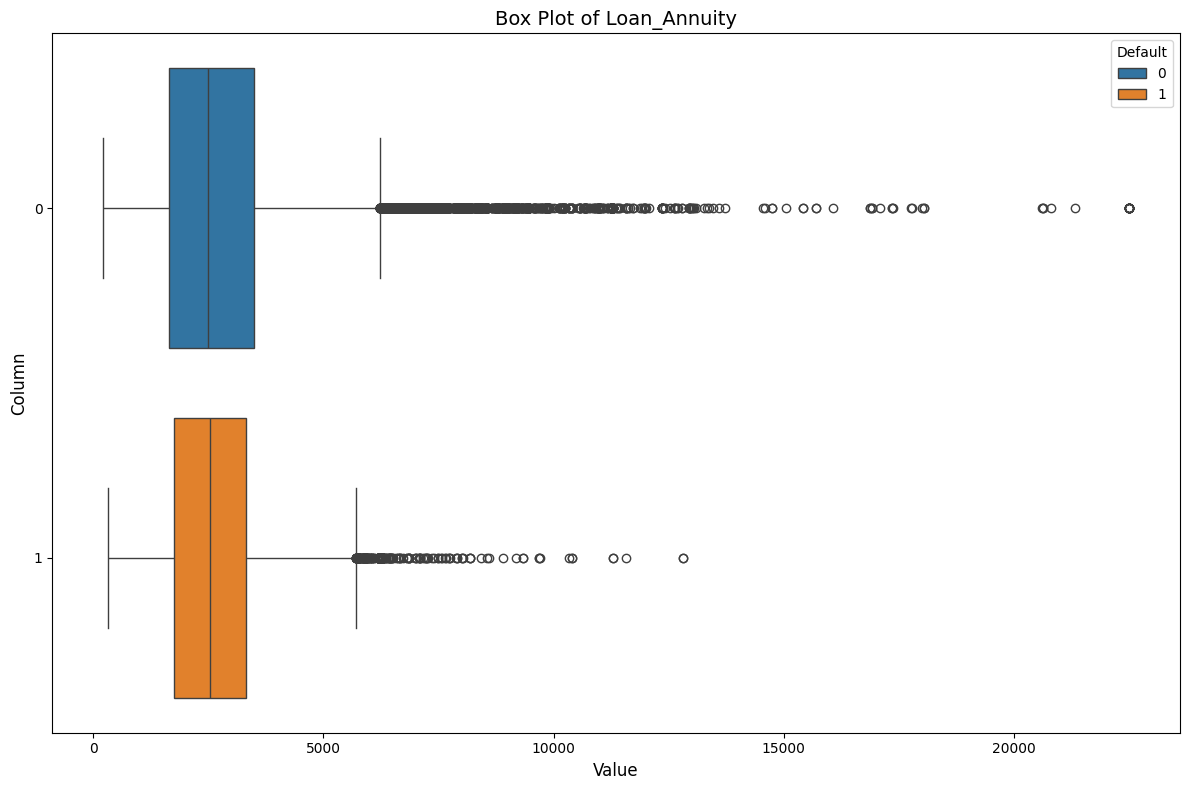

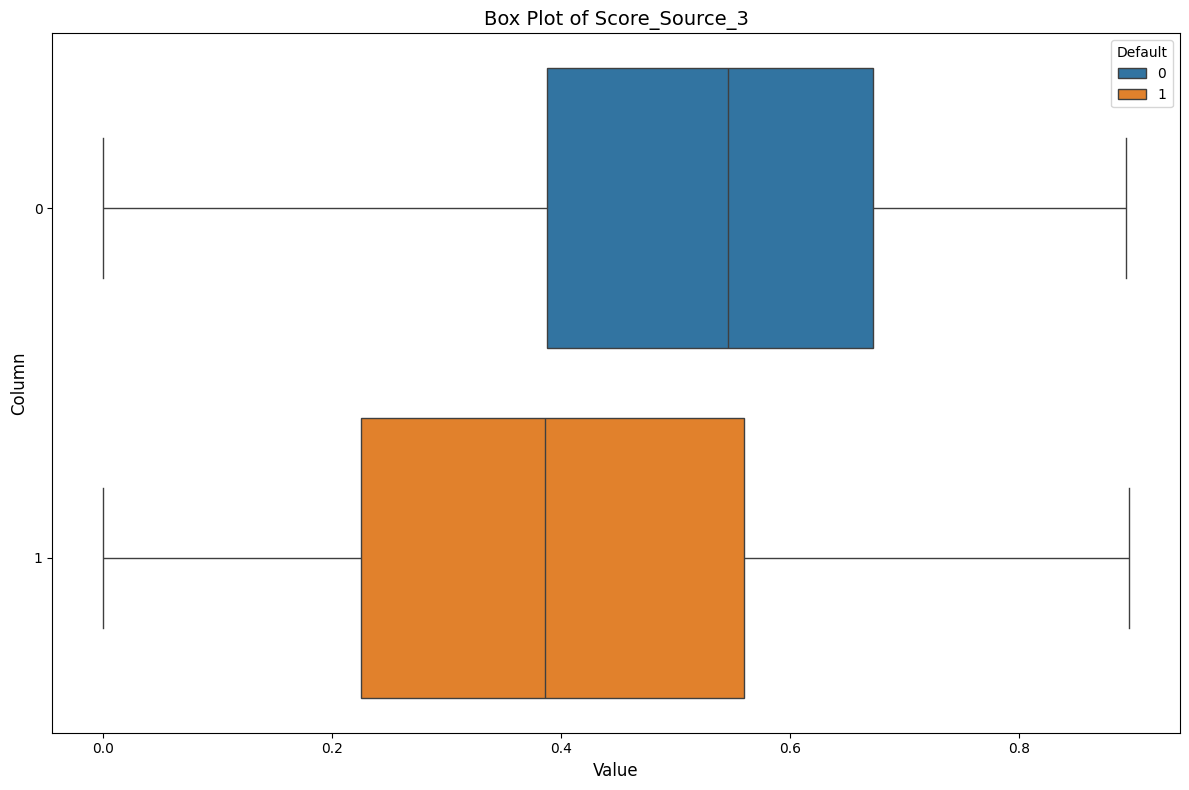

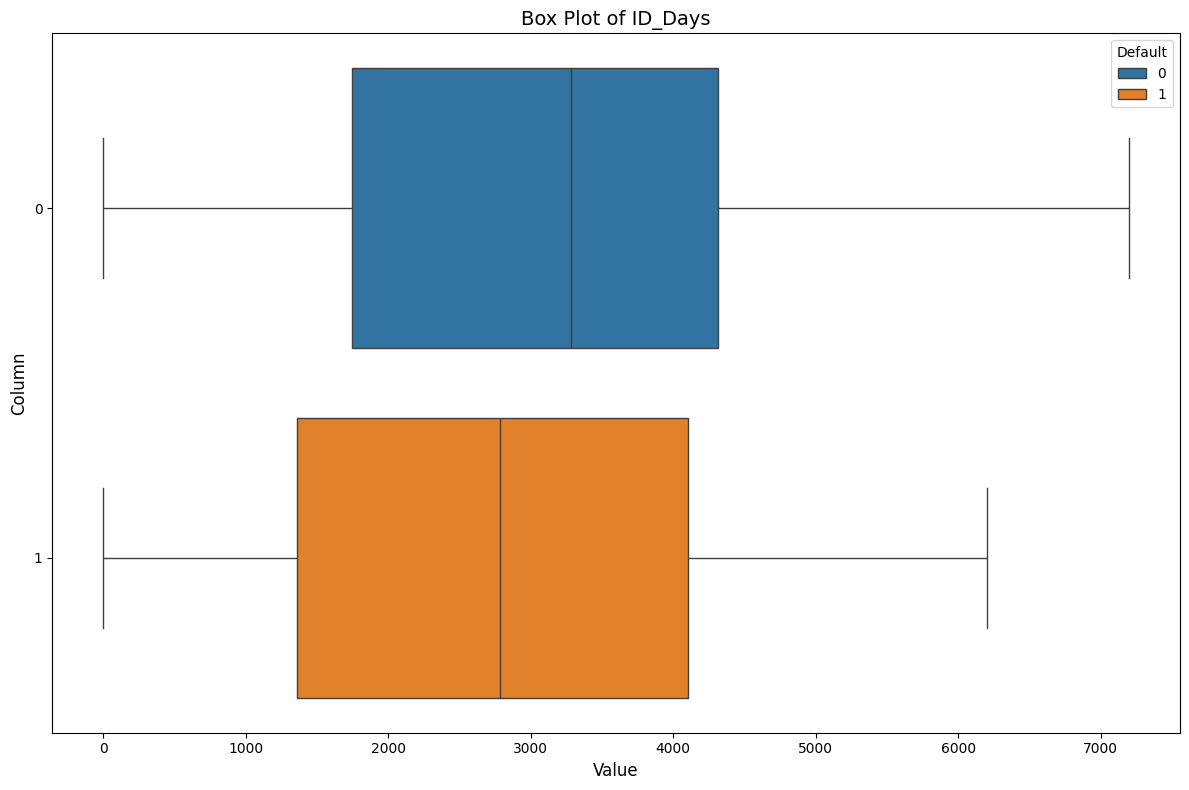

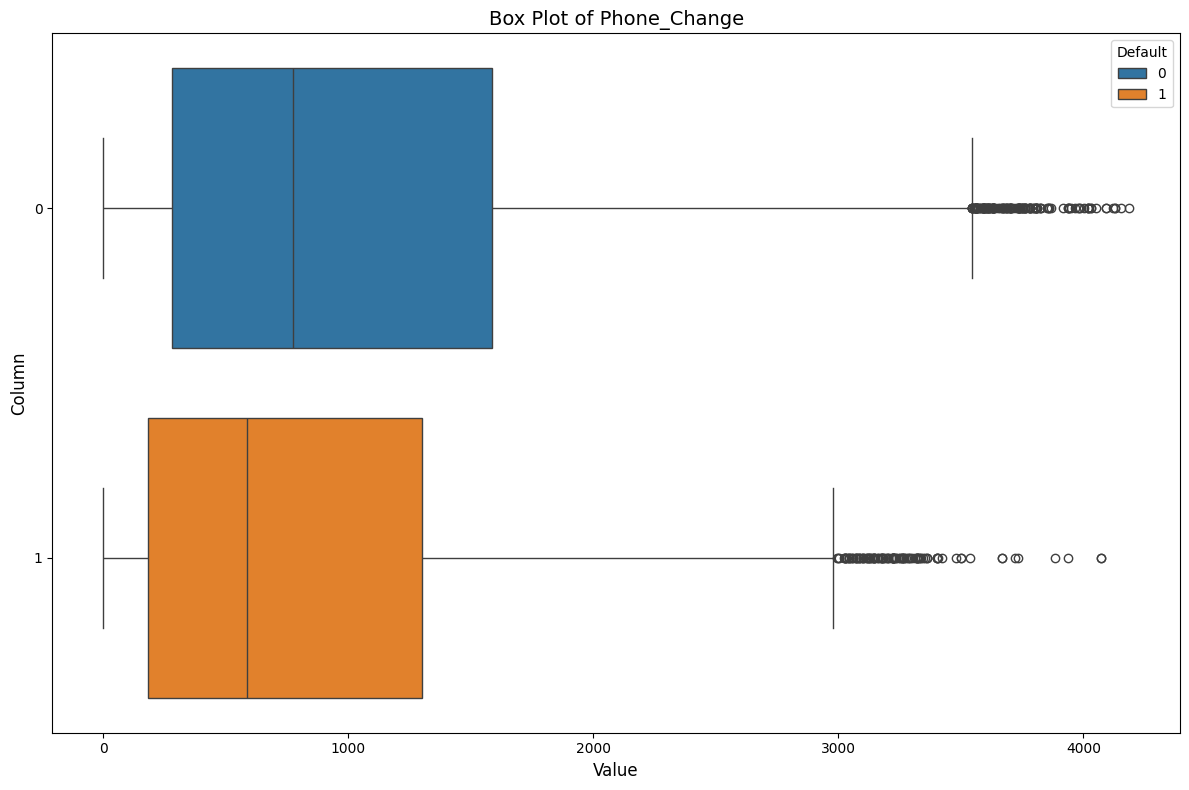

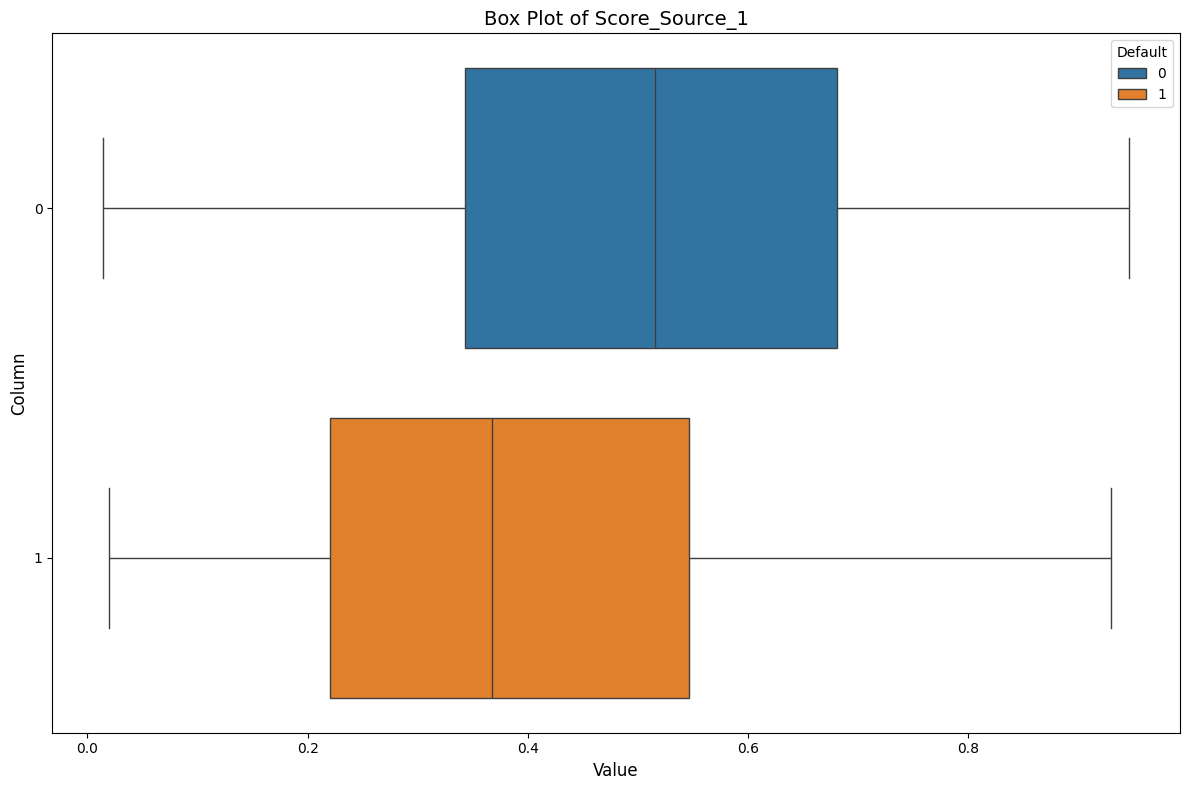

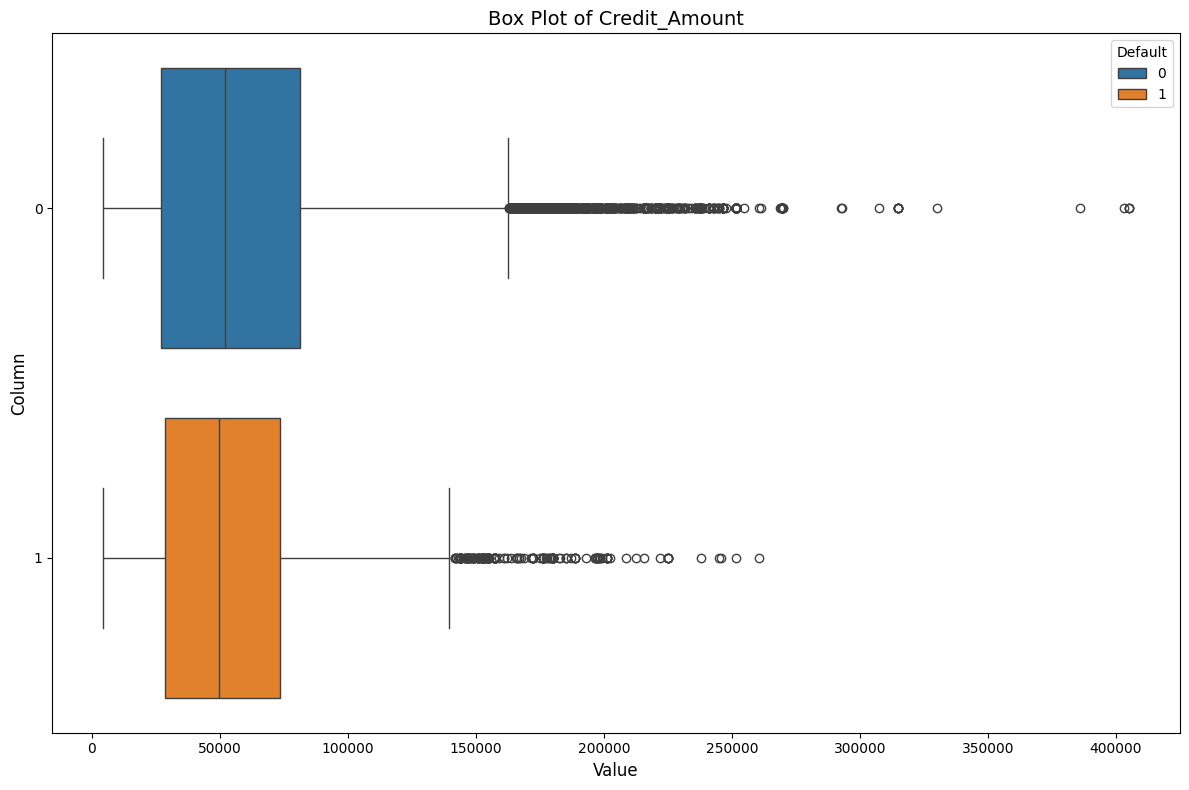

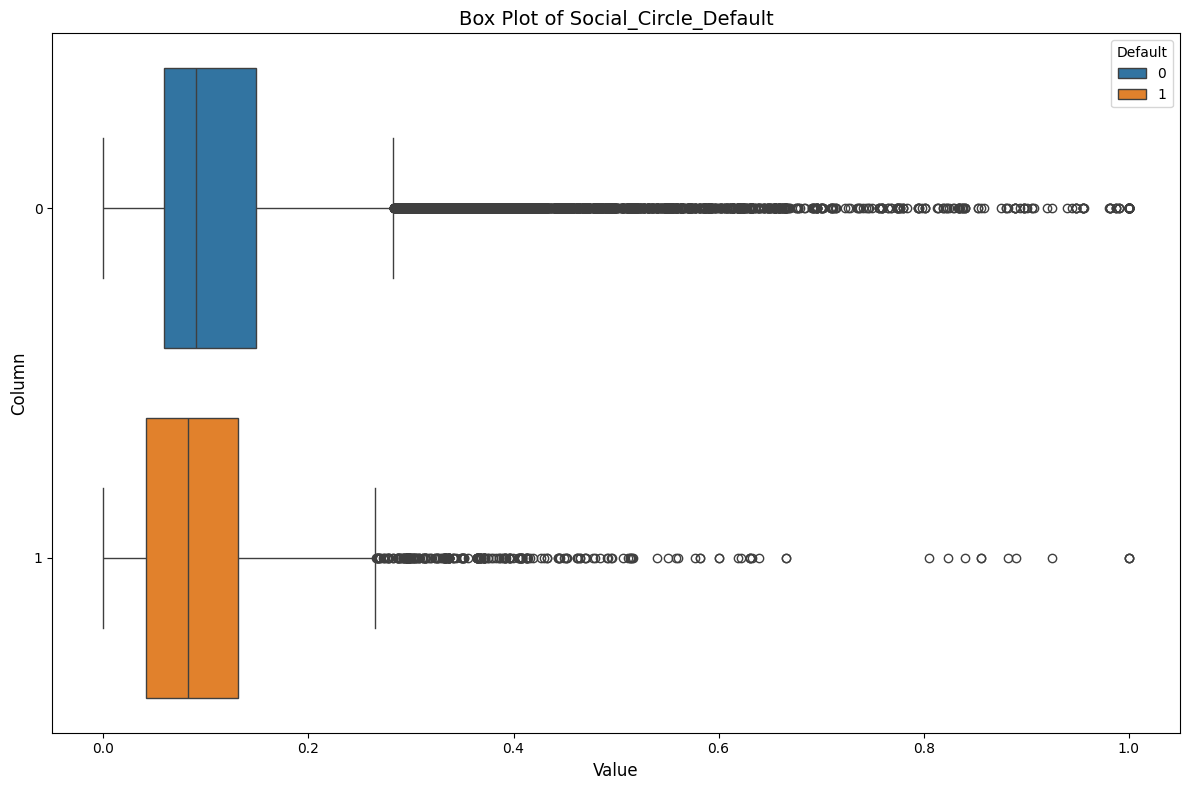

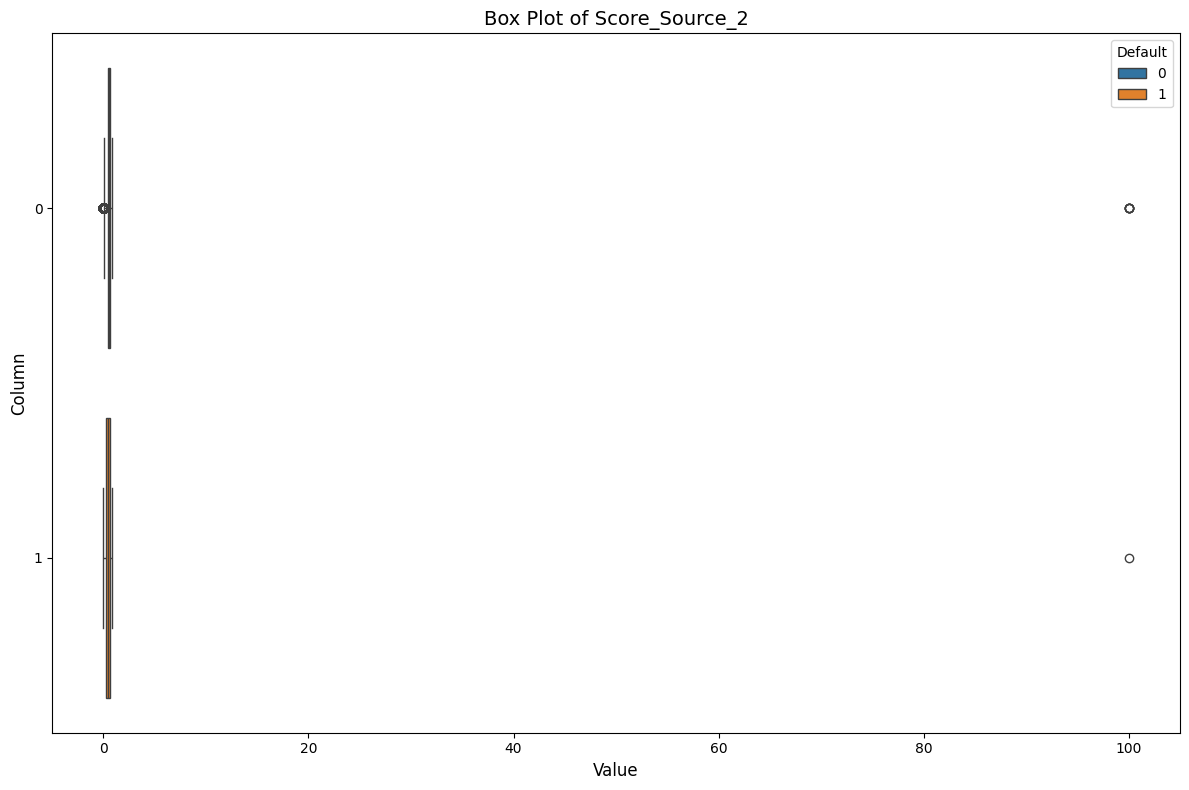

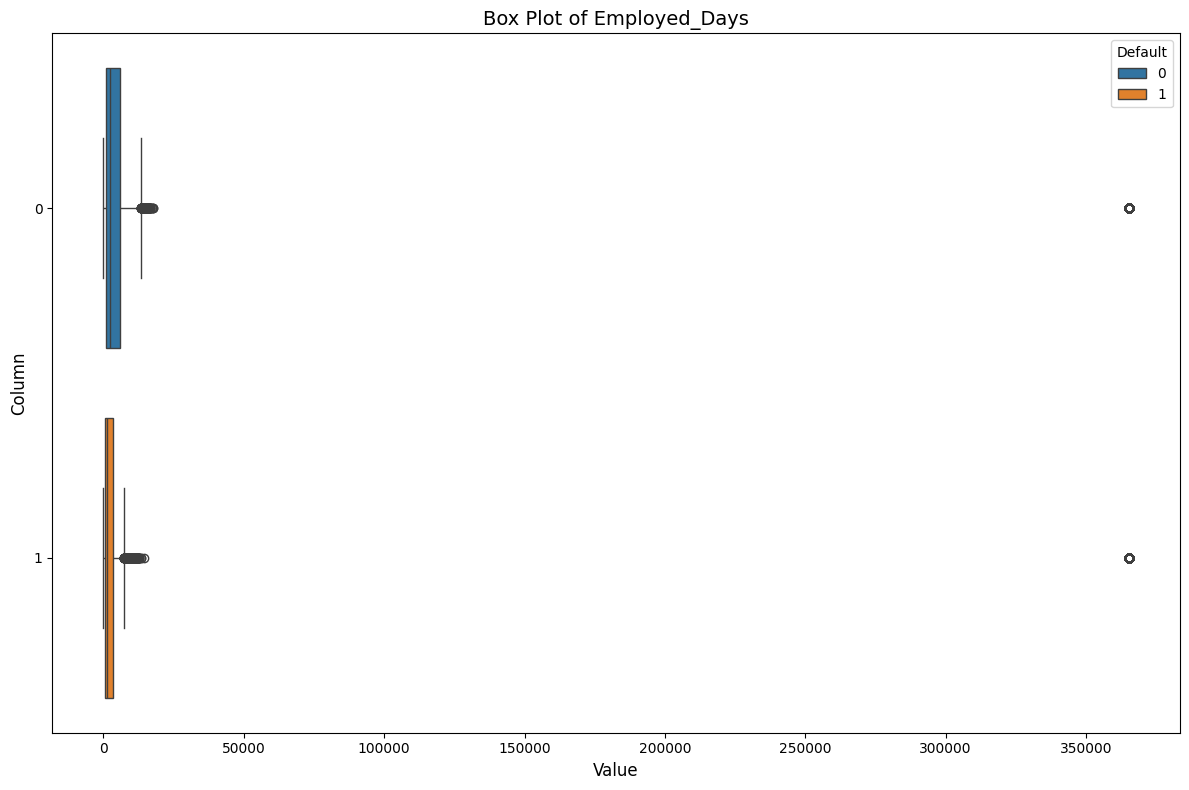

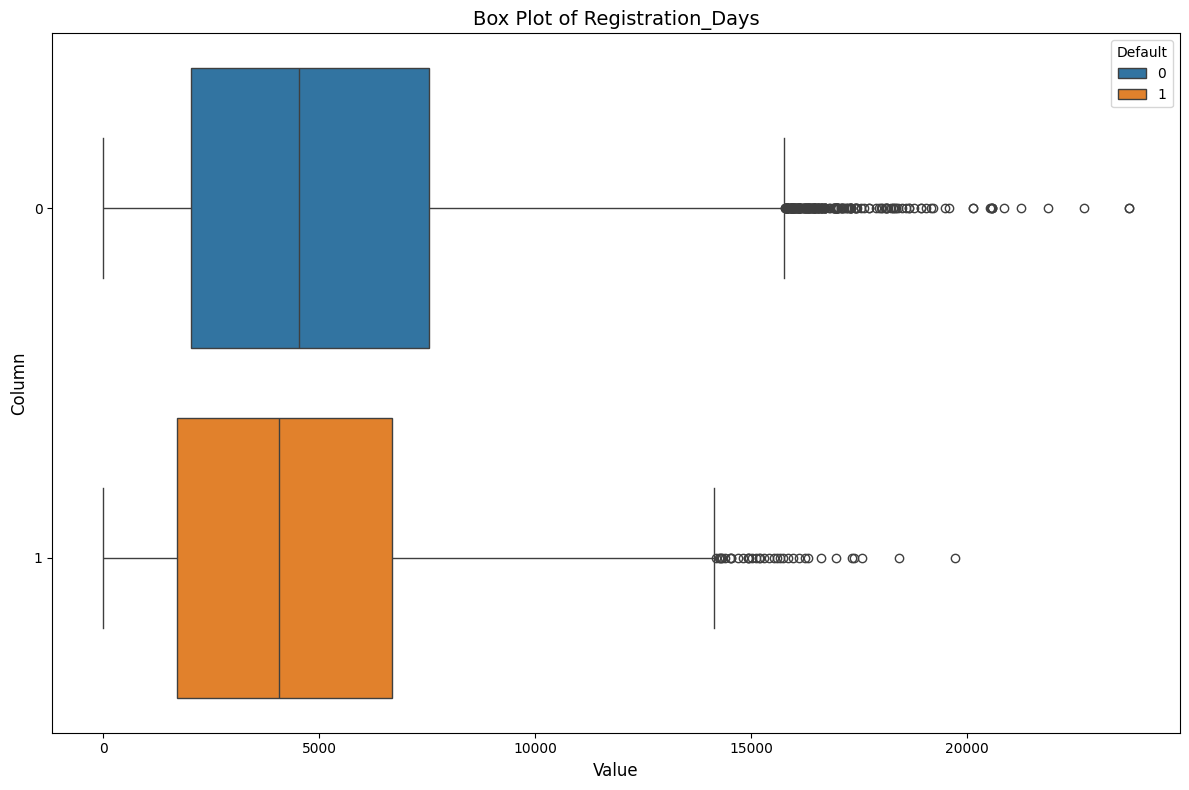

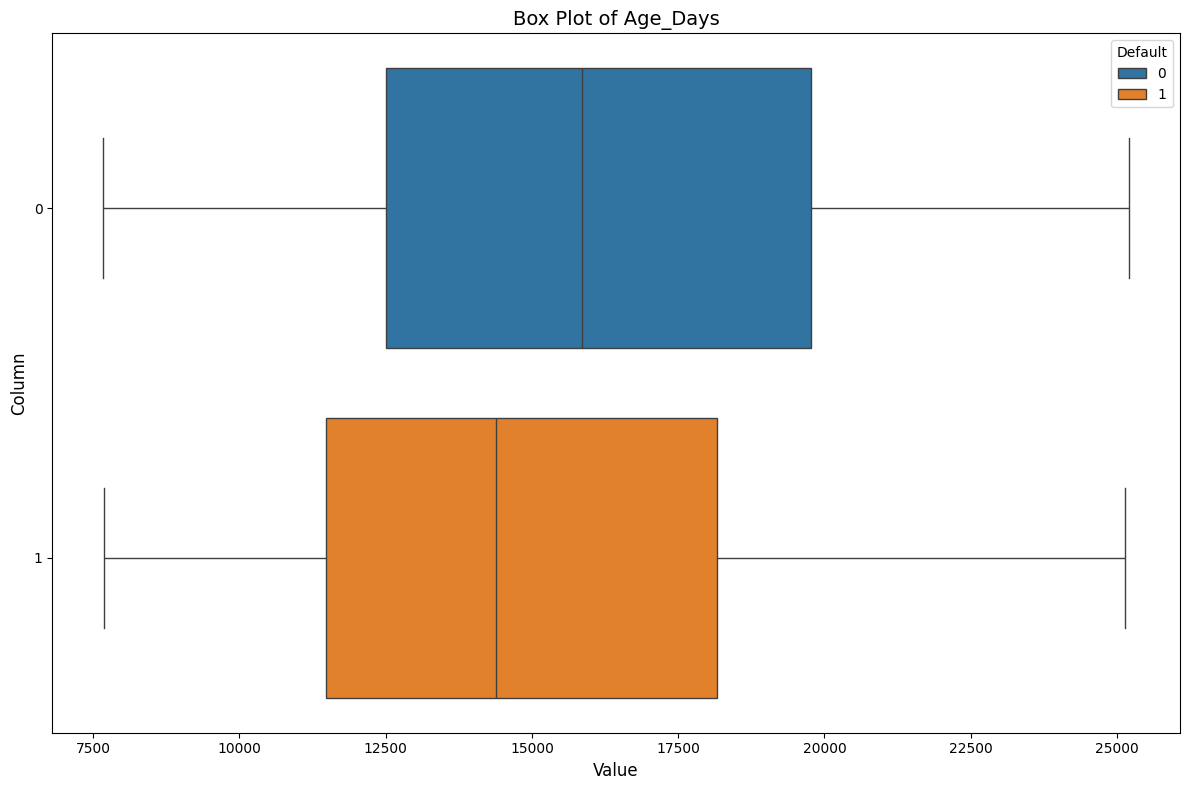

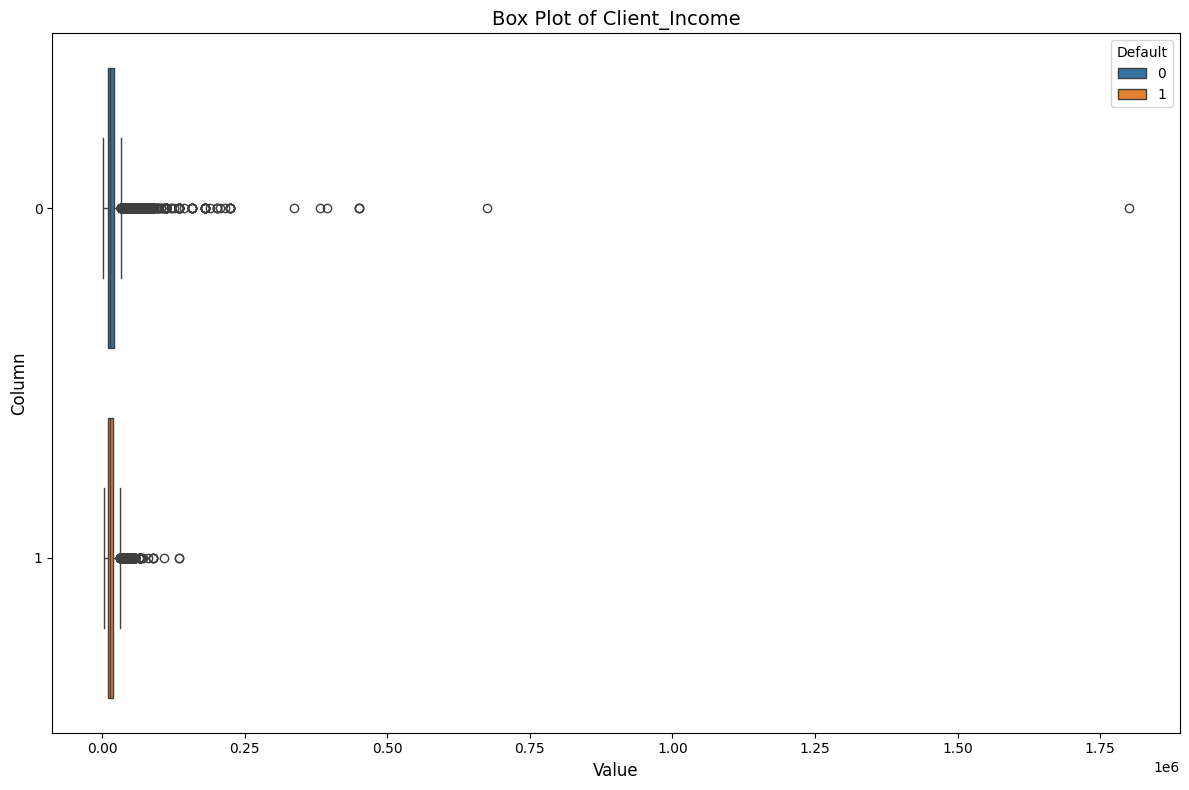

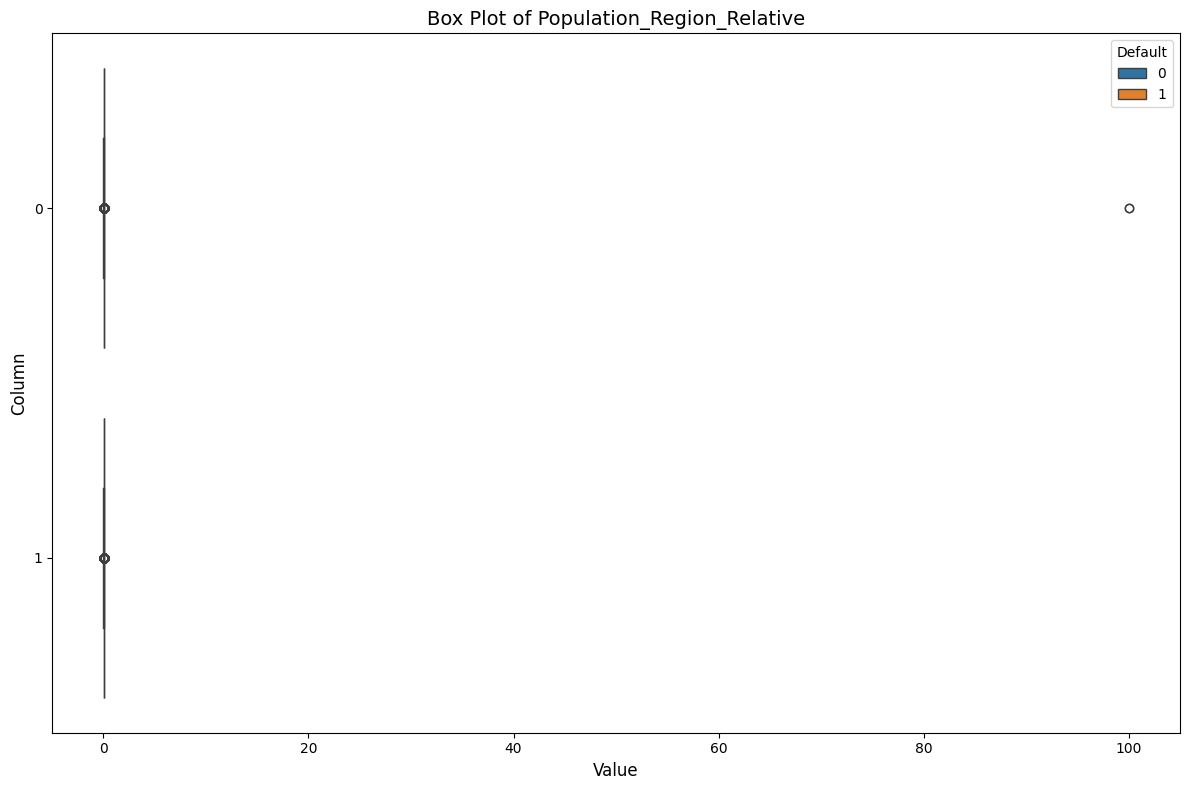

In [11]:
for s_column in numerical_cols:
    summary_stats = input_data[s_column].describe()
    Q1 = summary_stats.loc['25%']
    Q3 = summary_stats.loc['75%']
    IQR = Q3 - Q1
    outliers = ((input_data[s_column] < (Q1 - 1.5 * IQR)) | (input_data[s_column] > (Q3 + 1.5 * IQR)))
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=input_data, x=s_column, y='Default', hue='Default', orient='h')
    plt.title(f'Box Plot of {s_column}', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Column', fontsize=12)
    plt.tight_layout()
    plt.show()

# Outlier Handling

In [12]:
# few of the features having outlier but logically its right like few of the client might have
# income on higher side

from scipy.stats.mstats import winsorize
columns_with_outlier=["Score_Source_2","Employed_Days","Population_Region_Relative"]
for s_colum_out in columns_with_outlier:
    input_data[s_colum_out] = winsorize(input_data[s_colum_out], limits=(0, 0.05))

C:\Users\nikhi\anaconda3\envs\NLP\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


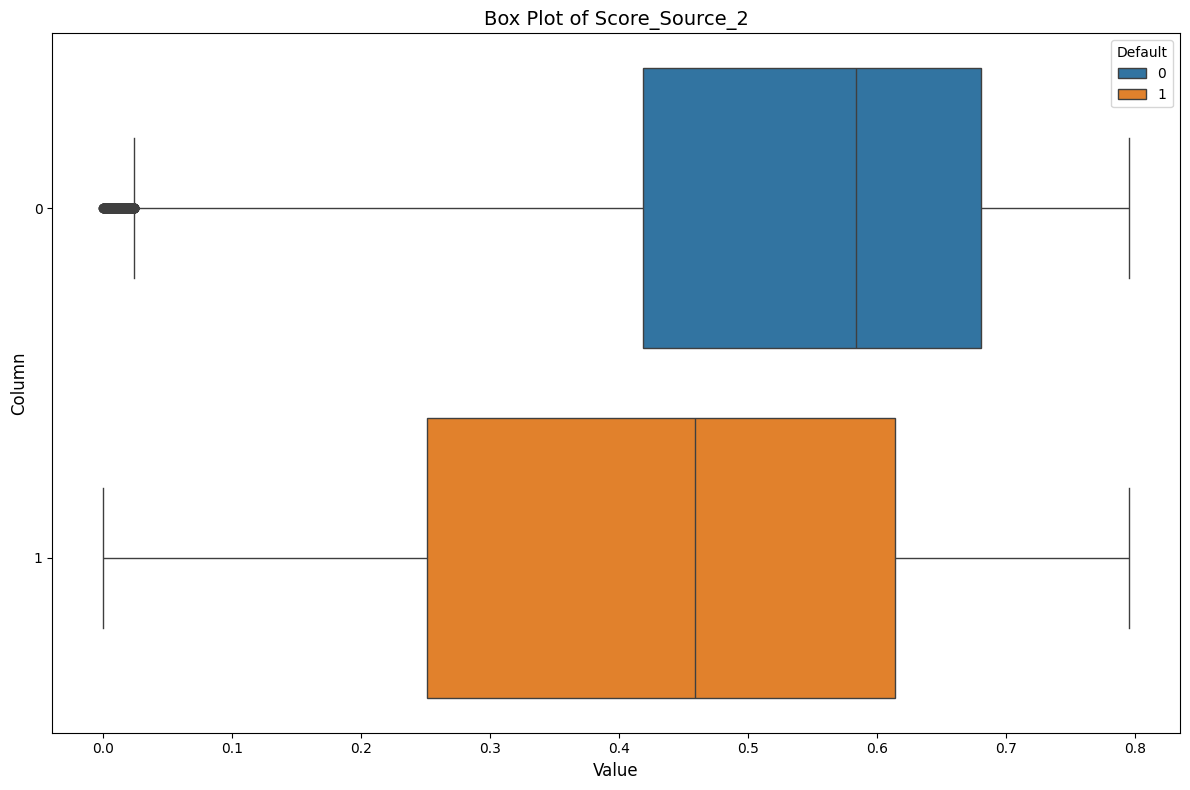

C:\Users\nikhi\anaconda3\envs\NLP\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


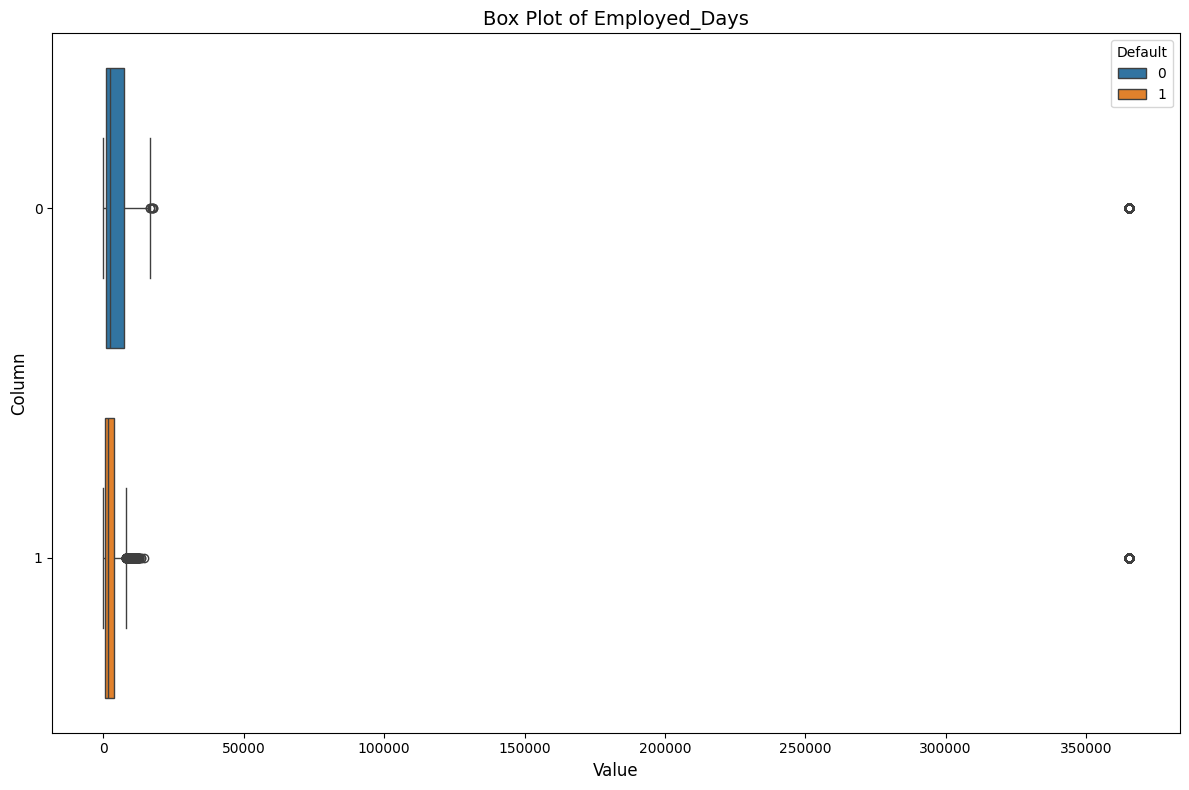

C:\Users\nikhi\anaconda3\envs\NLP\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


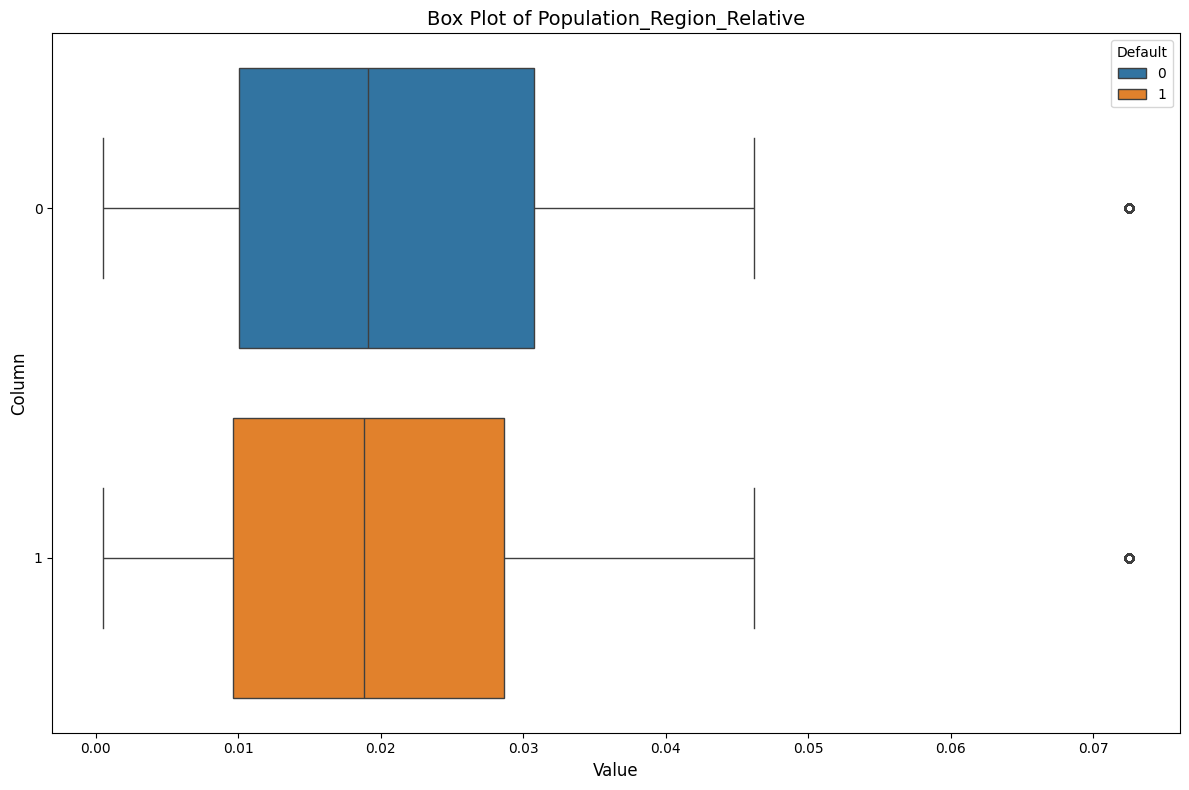

In [13]:
for s_column in columns_with_outlier:
    summary_stats = input_data[s_column].describe()
    Q1 = summary_stats.loc['25%']
    Q3 = summary_stats.loc['75%']
    IQR = Q3 - Q1
    outliers = ((input_data[s_column] < (Q1 - 1.5 * IQR)) | (input_data[s_column] > (Q3 + 1.5 * IQR)))
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=input_data, x=s_column, y='Default', hue='Default', orient='h')
    plt.title(f'Box Plot of {s_column}', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Column', fontsize=12)
    plt.tight_layout()
    plt.show()

# Missing Value Analysis

In [14]:
# % of Missing Data
less_missing_data_col=[]
majority_missing_data_col=[]
print("#"*10, "% Data missing < 10% ","#"*10)
for s_ver in input_data.columns:
    if (input_data[s_ver].isna().sum() / input_data.shape[0] * 100)<10.0:
        print(f"{s_ver}------->{(input_data[s_ver].isna().sum() / input_data.shape[0] * 100):.2f} ")
        less_missing_data_col.append(s_ver)

print("#"*10, "% Data missing > 10% ","#"*10)
for s_ver in input_data.columns: 
    if (input_data[s_ver].isna().sum() / input_data.shape[0] * 100)>10.0:
        print(f"{s_ver}------->{(input_data[s_ver].isna().sum() / input_data.shape[0] * 100):.2f} ")
        majority_missing_data_col.append(s_ver)

########## % Data missing < 10%  ##########
ID------->0.00 
Client_Income------->2.97 
Car_Owned------->2.94 
Bike_Owned------->2.97 
Active_Loan------->2.98 
House_Own------->3.00 
Child_Count------->2.99 
Credit_Amount------->2.98 
Loan_Annuity------->3.96 
Accompany_Client------->1.44 
Client_Income_Type------->3.04 
Client_Education------->2.99 
Client_Marital_Status------->2.85 
Client_Gender------->1.98 
Loan_Contract_Type------->3.00 
Client_Housing_Type------->3.03 
Population_Region_Relative------->0.00 
Age_Days------->2.97 
Employed_Days------->0.00 
Registration_Days------->2.98 
ID_Days------->4.91 
Mobile_Tag------->0.00 
Homephone_Tag------->0.00 
Workphone_Working------->0.00 
Client_Family_Members------->1.98 
Cleint_City_Rating------->1.98 
Application_Process_Day------->1.99 
Application_Process_Hour------->3.01 
Client_Permanent_Match_Tag------->0.00 
Client_Contact_Work_Tag------->0.00 
Score_Source_2------->0.00 
Phone_Change------->3.01 
Default------->0.00 
####

# Columns with Missing Values <10%

## For Categorical Columns (Categorical + Categorical in Number Form)

In [29]:
imputed_data=input_data.copy()

In [39]:
all_combine_cat_col=categorical_cols.copy()
all_combine_cat_col.extend(categoricla_num_column)
column_cat_less_10=list(set(less_missing_data_col)&set(all_combine_cat_col))

In [31]:
imputer_mode = SimpleImputer(strategy='most_frequent')
imputed_data[column_cat_less_10] = imputer_mode.fit_transform(imputed_data[column_cat_less_10])

### Visualizaion / Validation of Data Distribution Befor Imputation and After Imputation

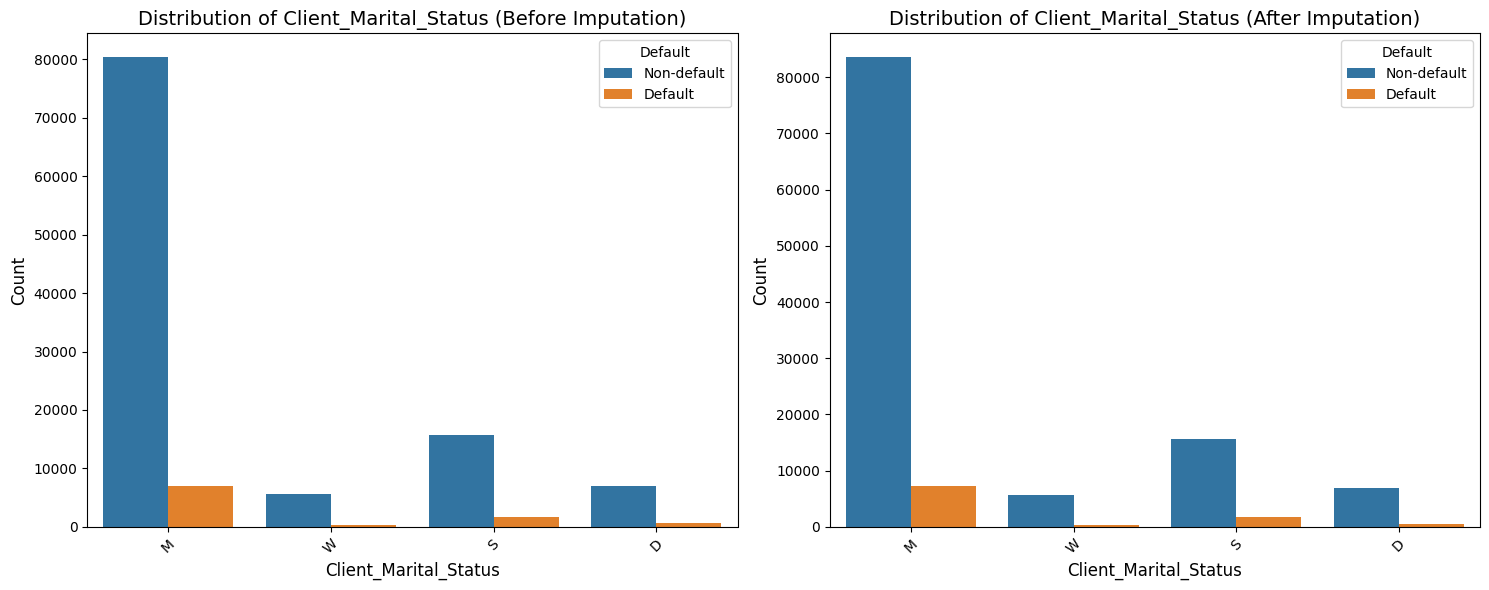

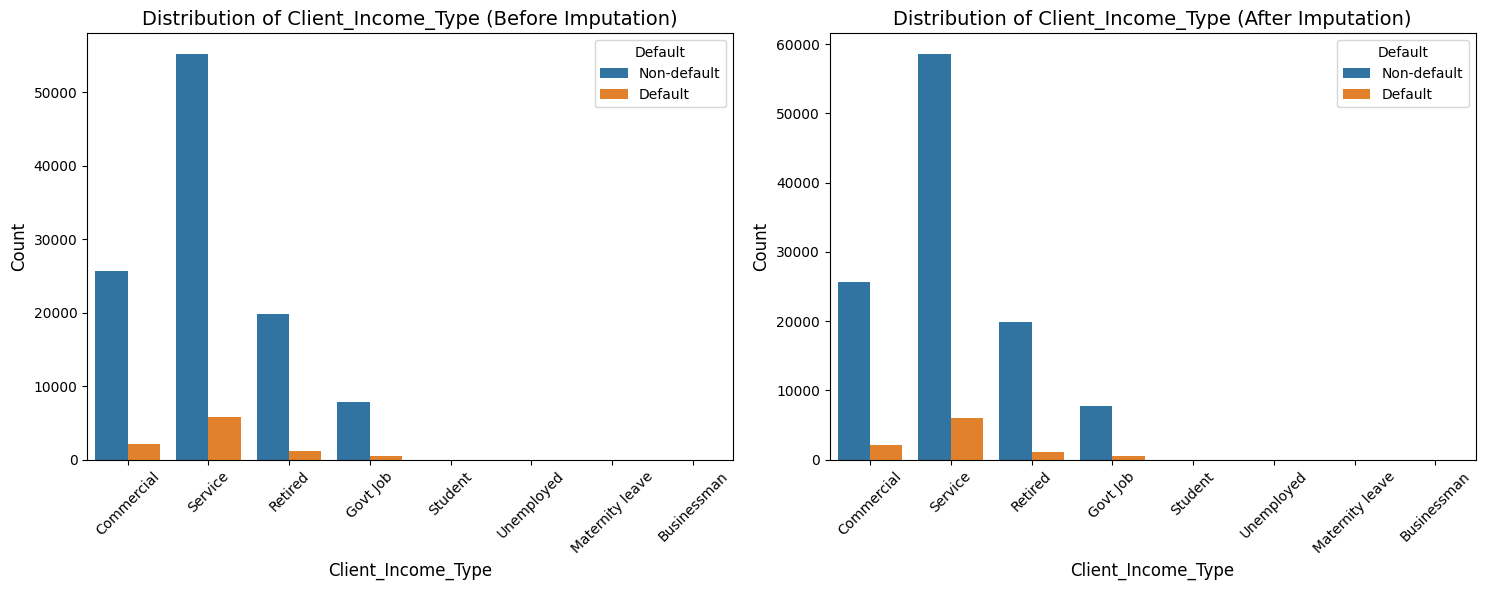

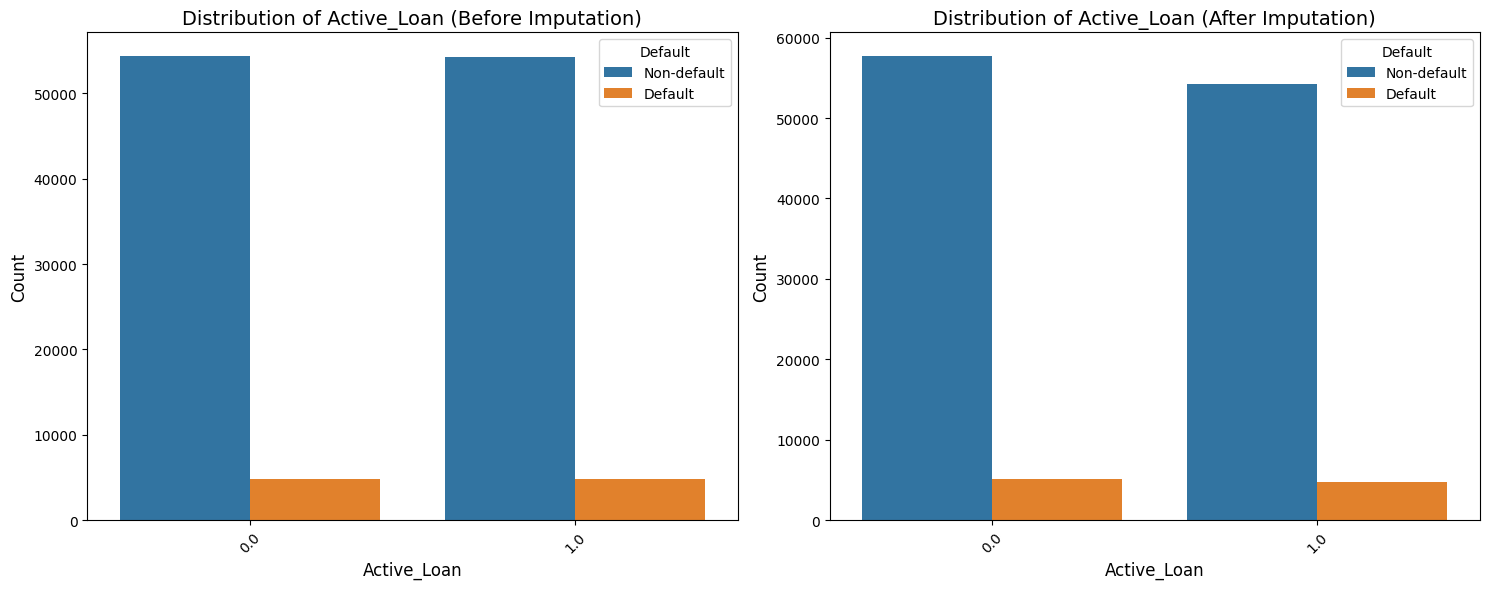

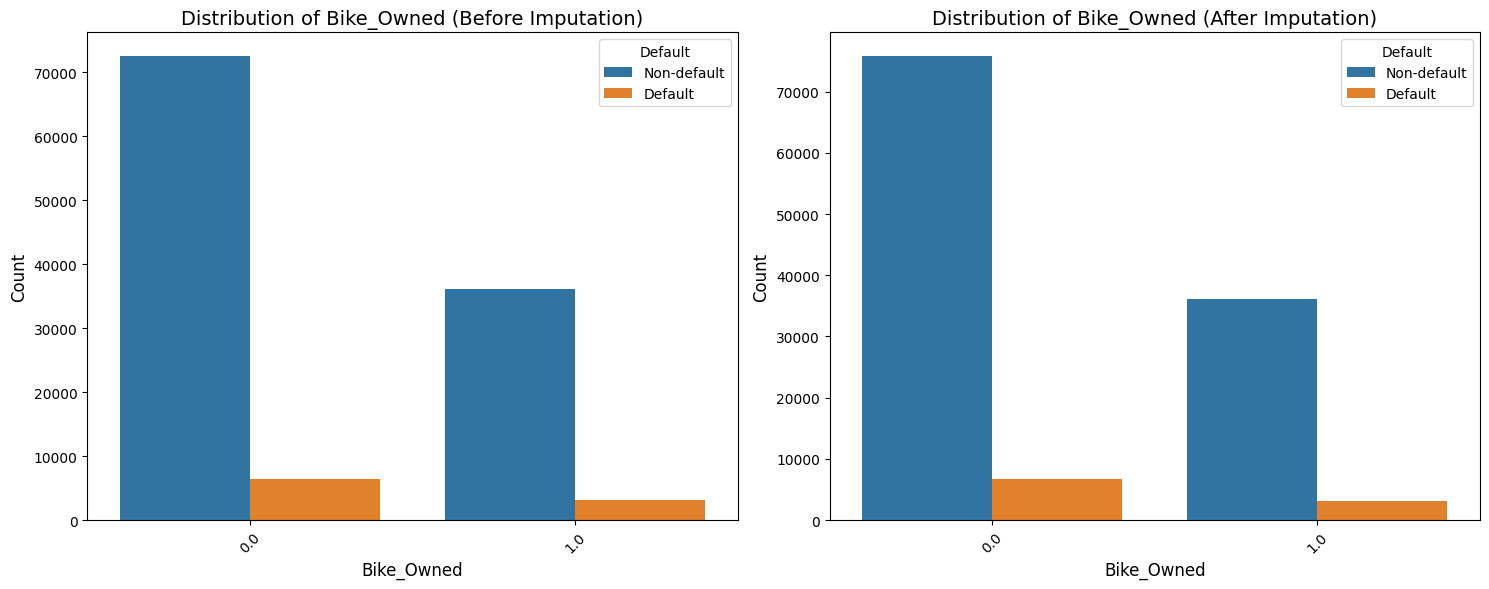

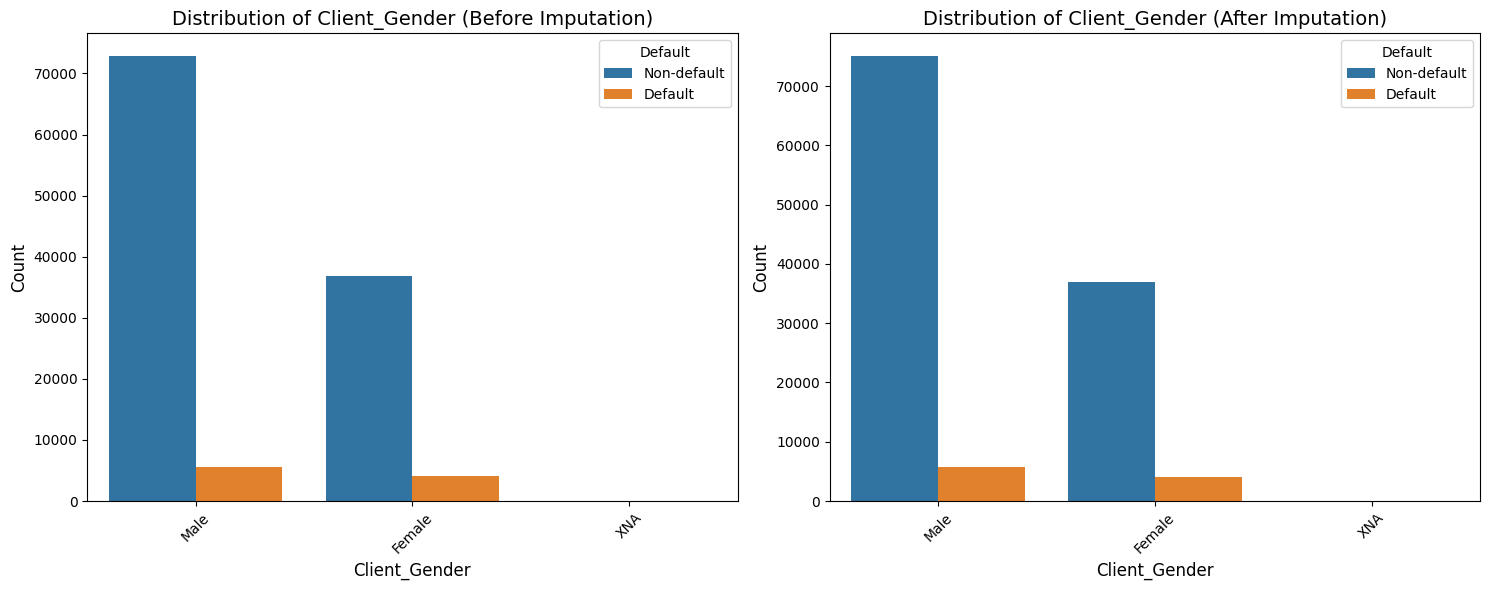

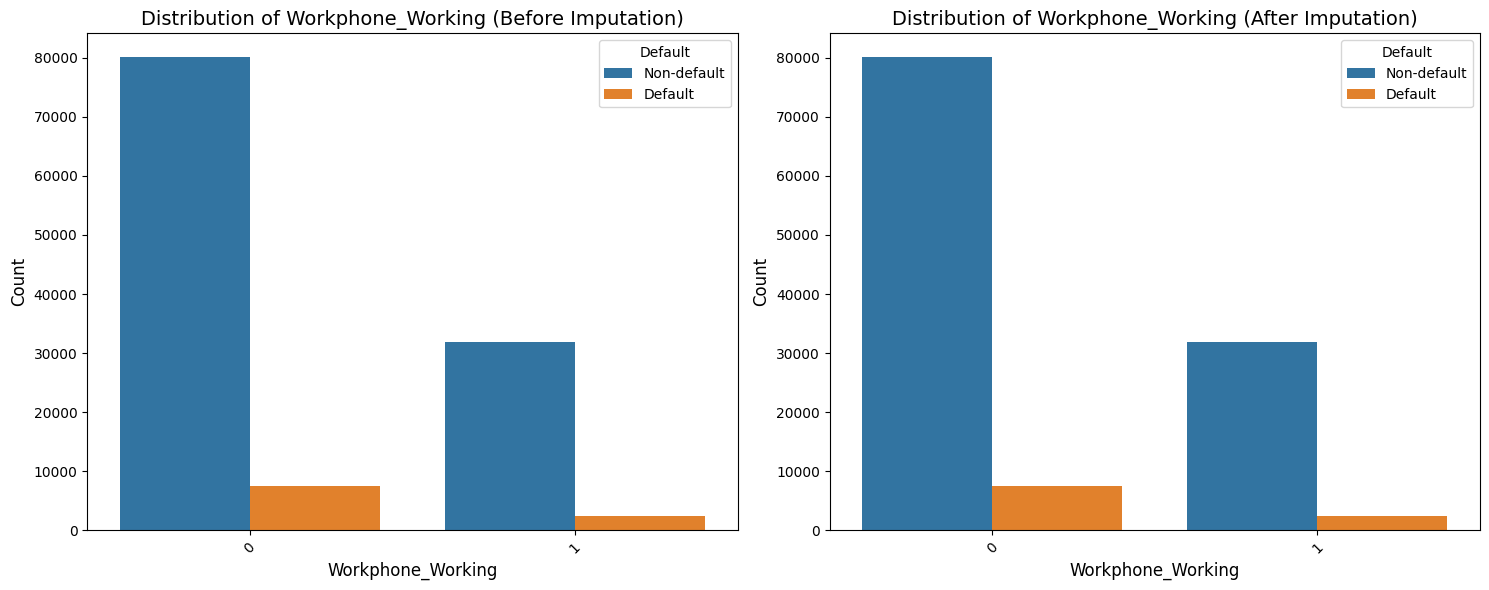

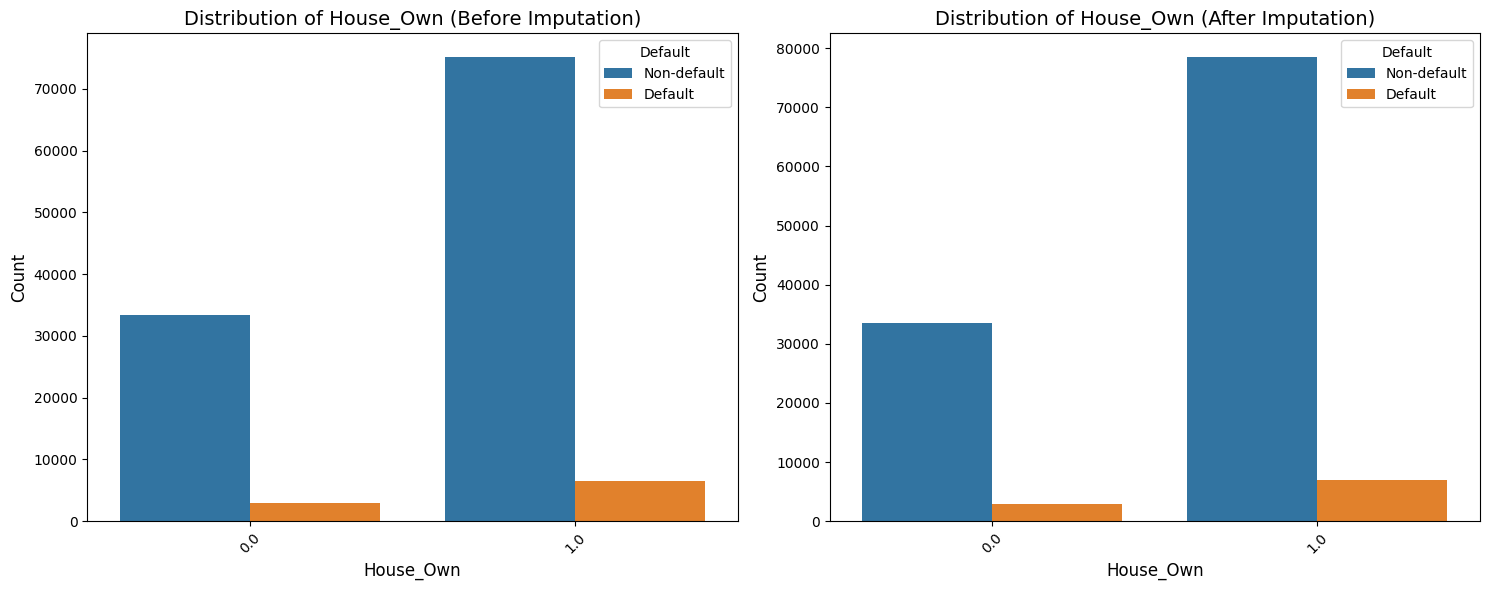

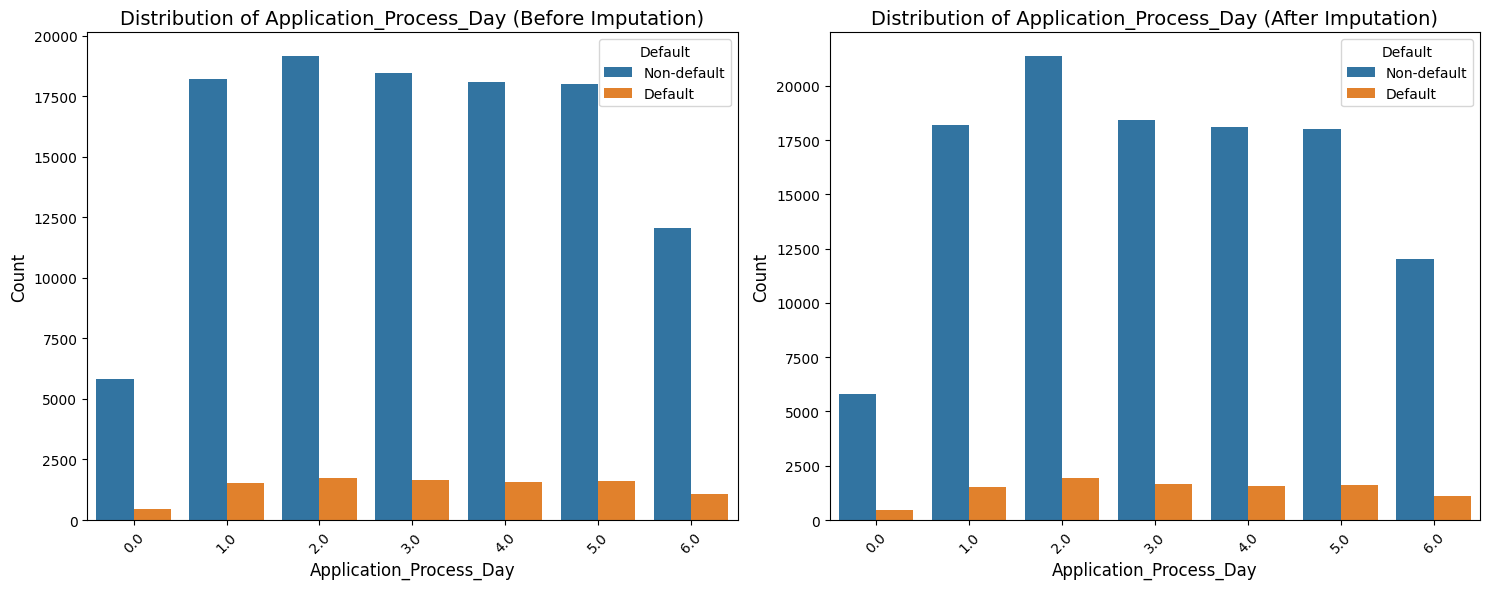

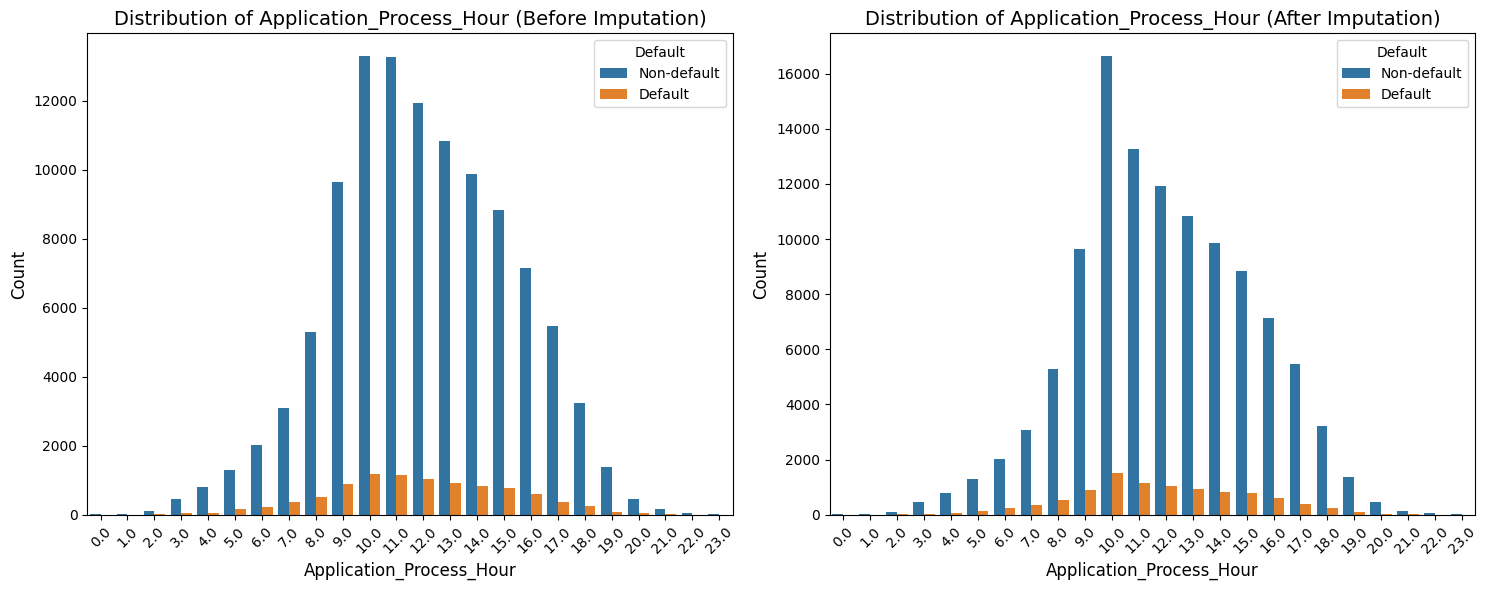

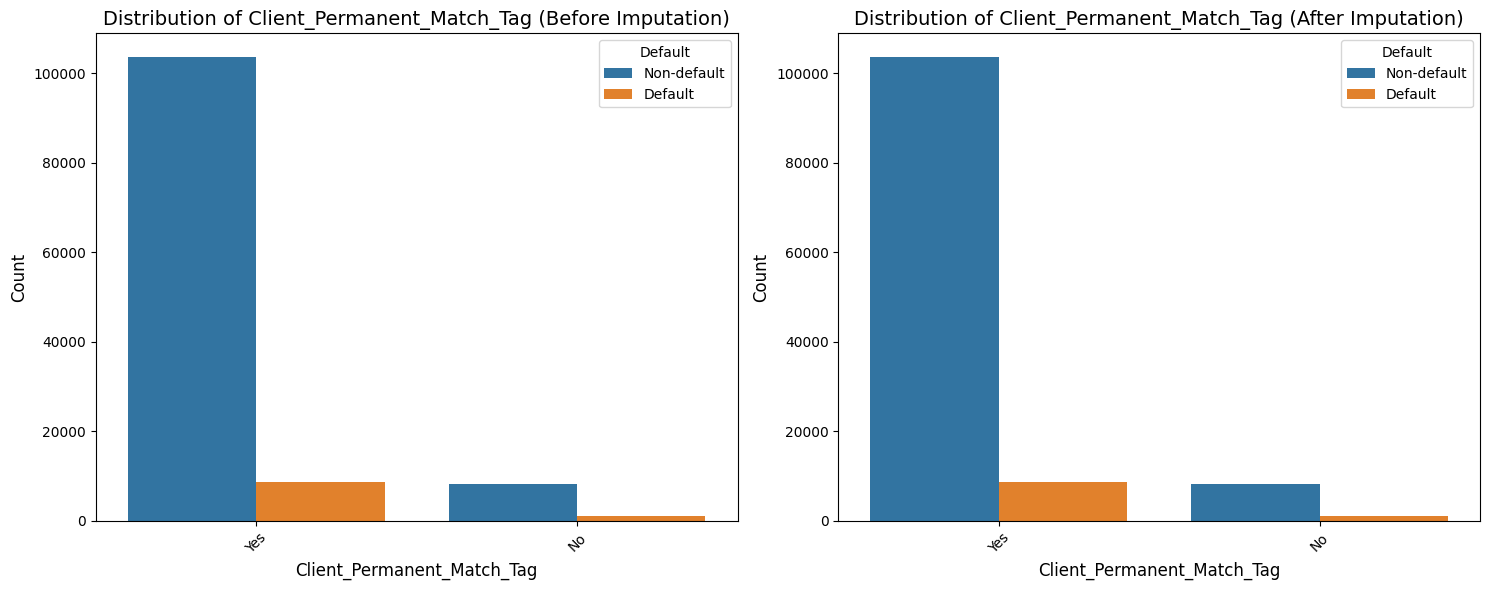

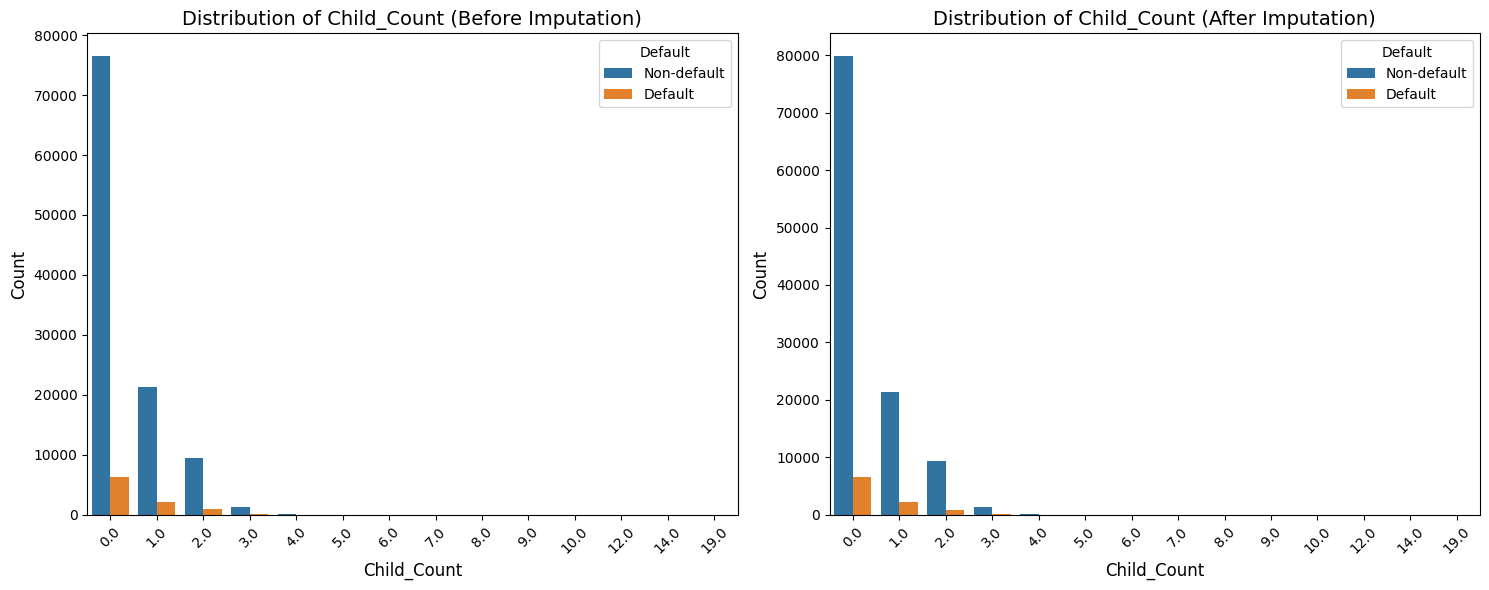

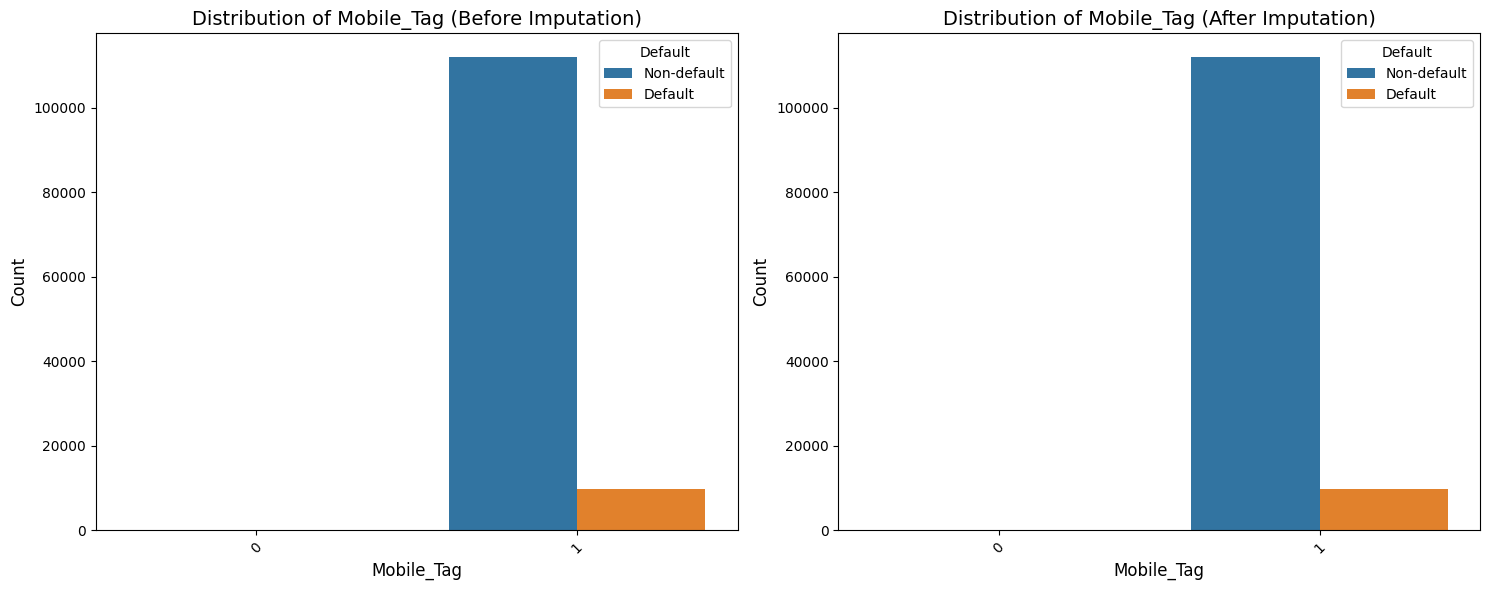

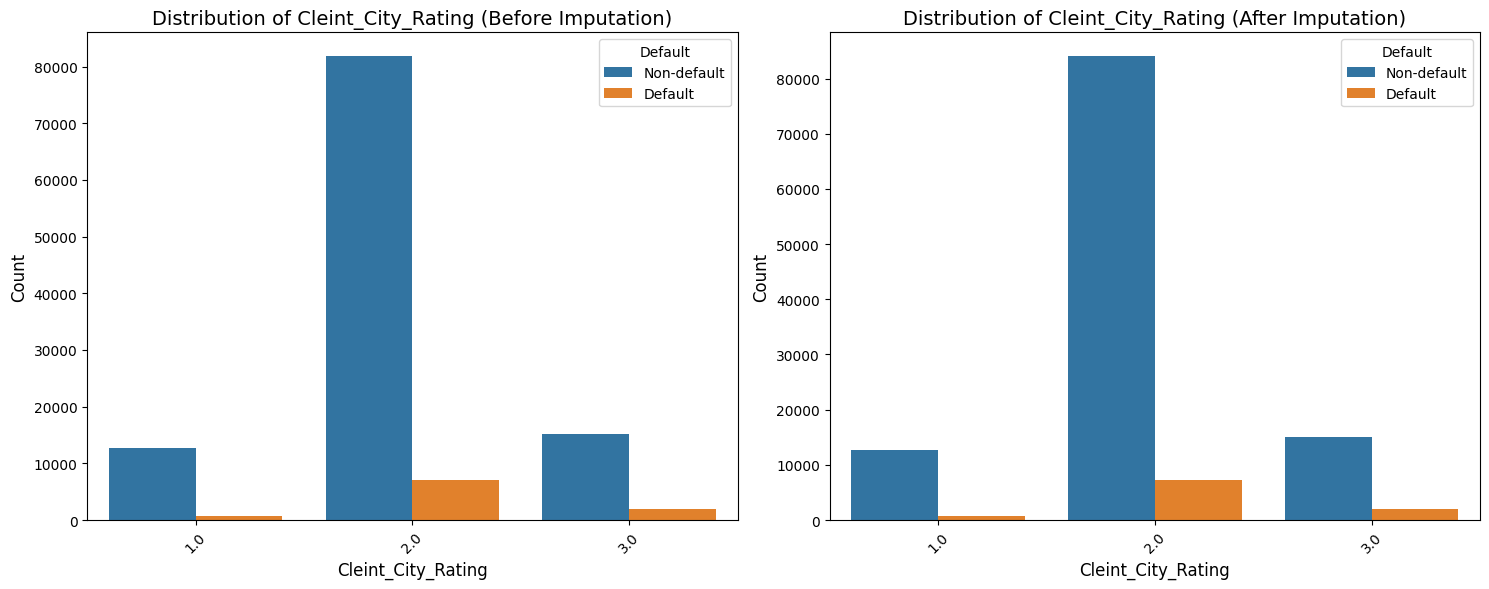

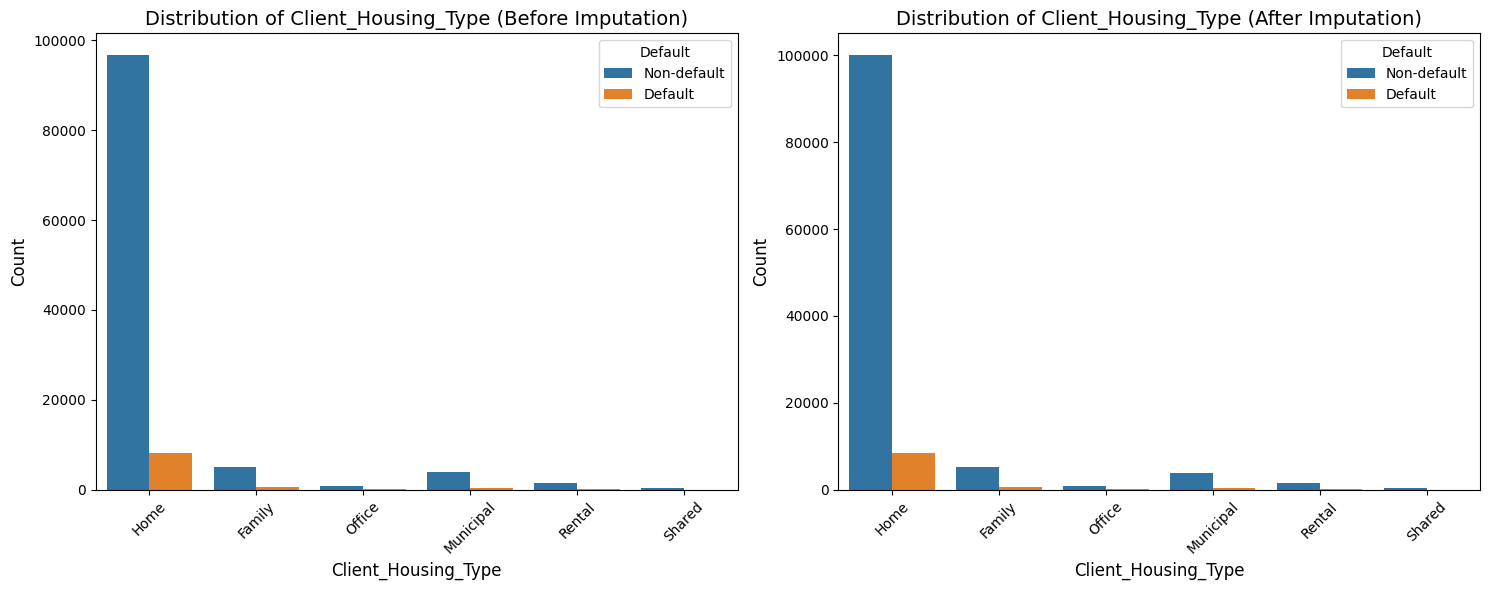

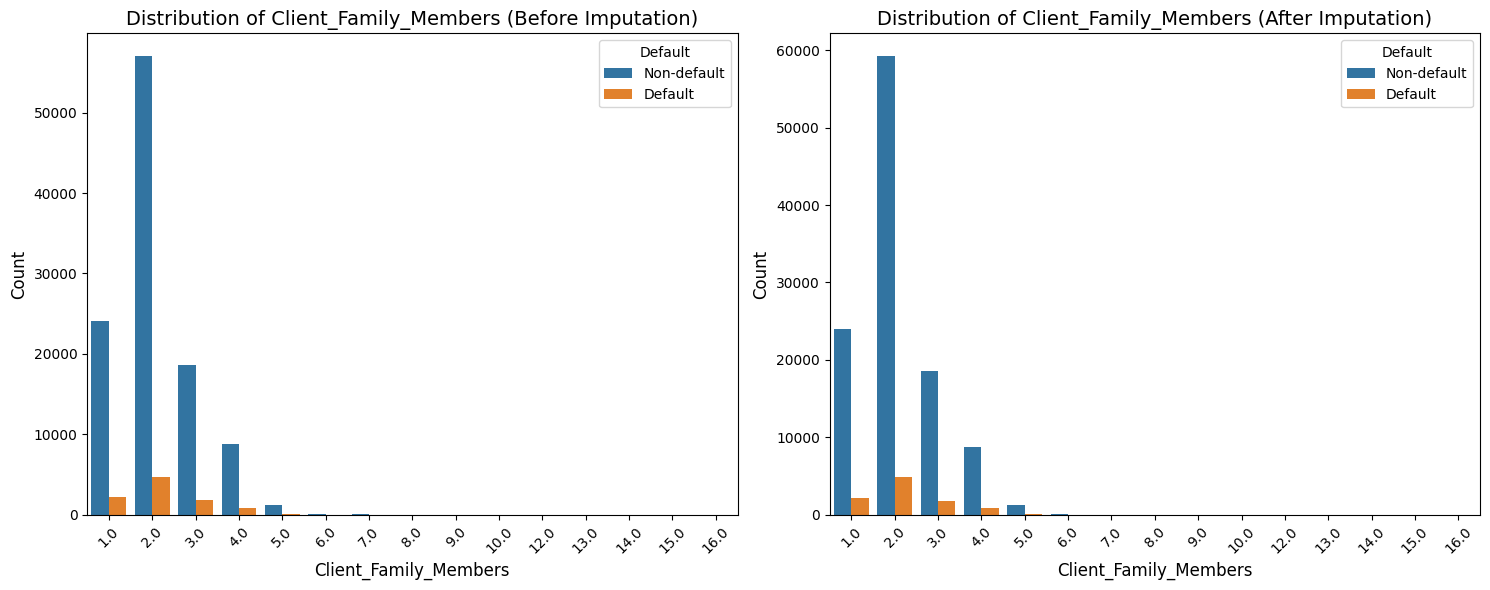

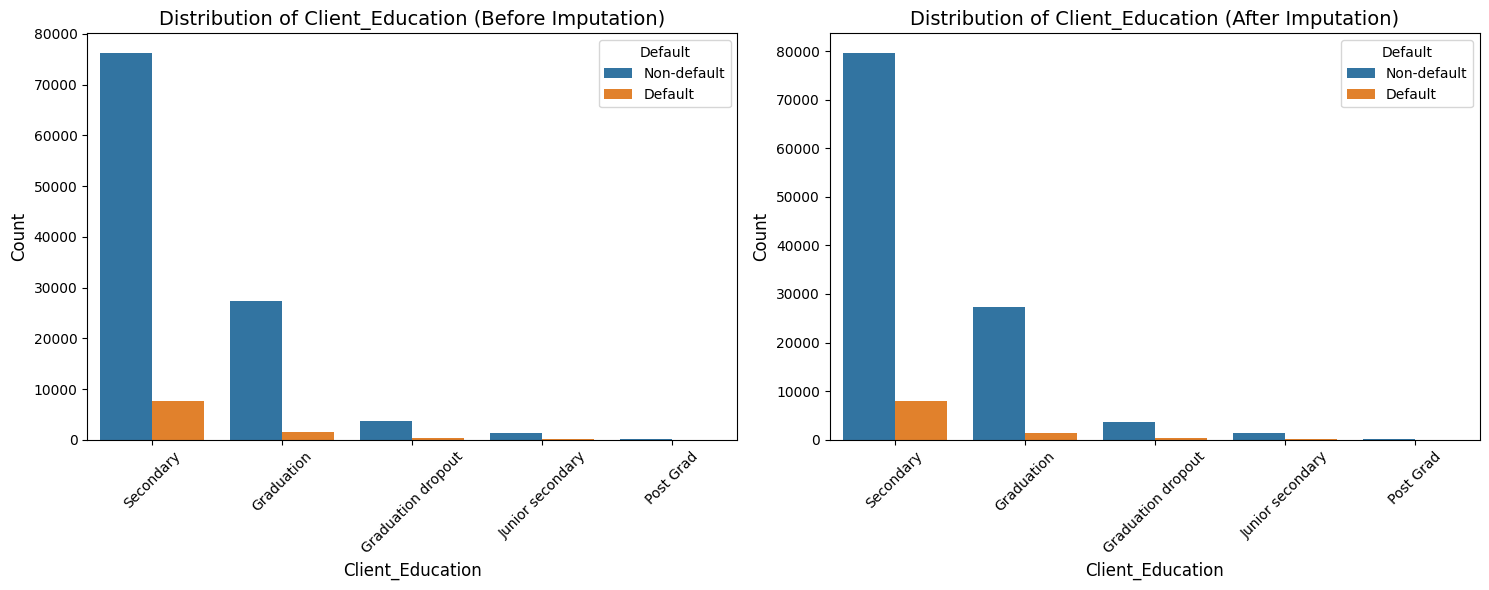

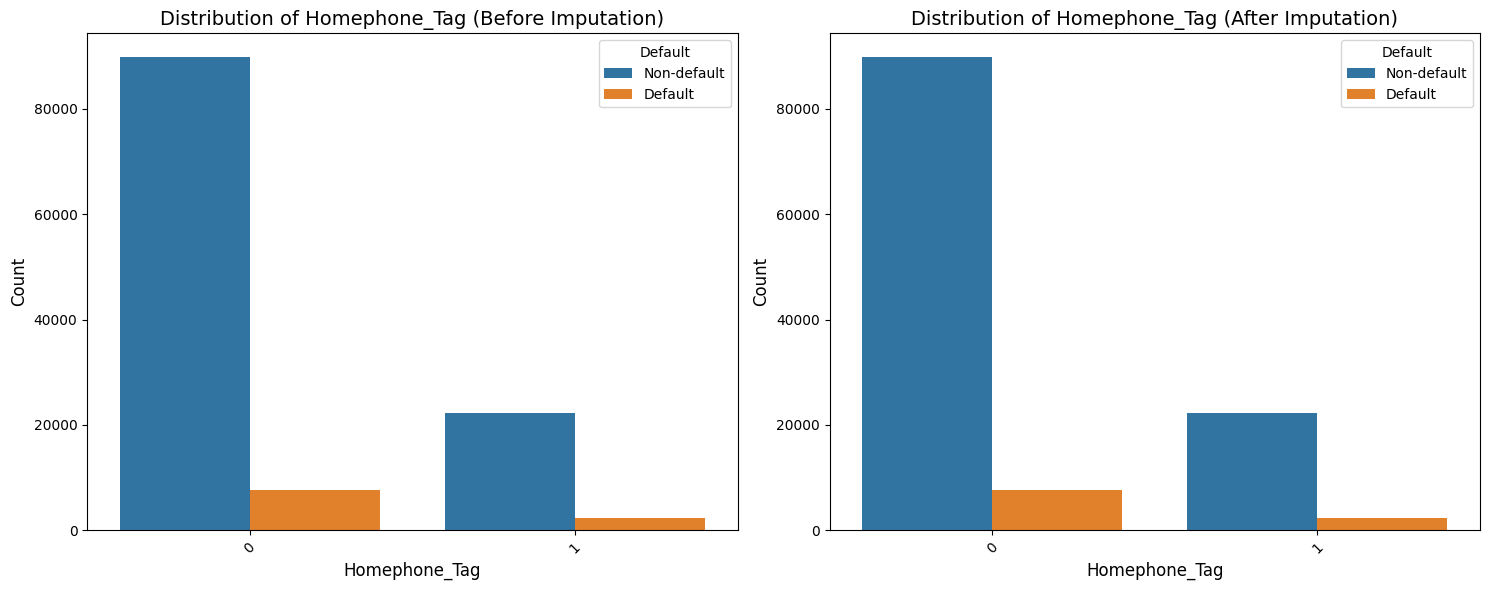

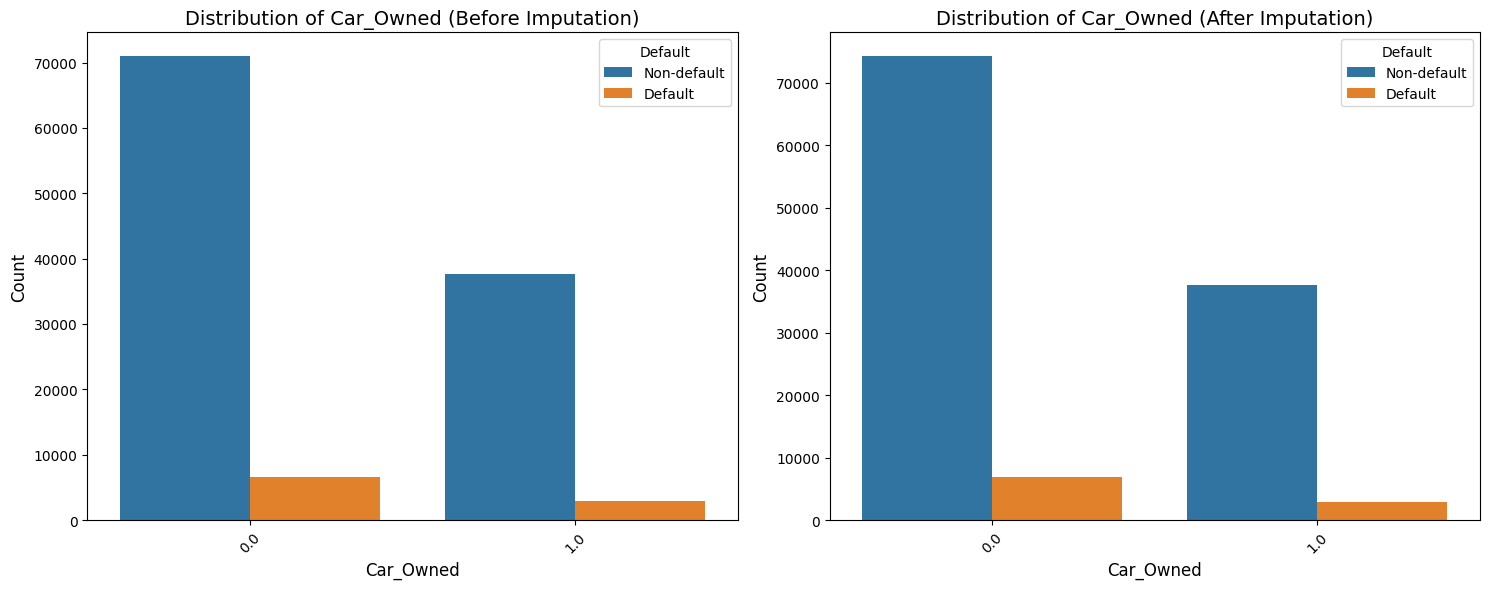

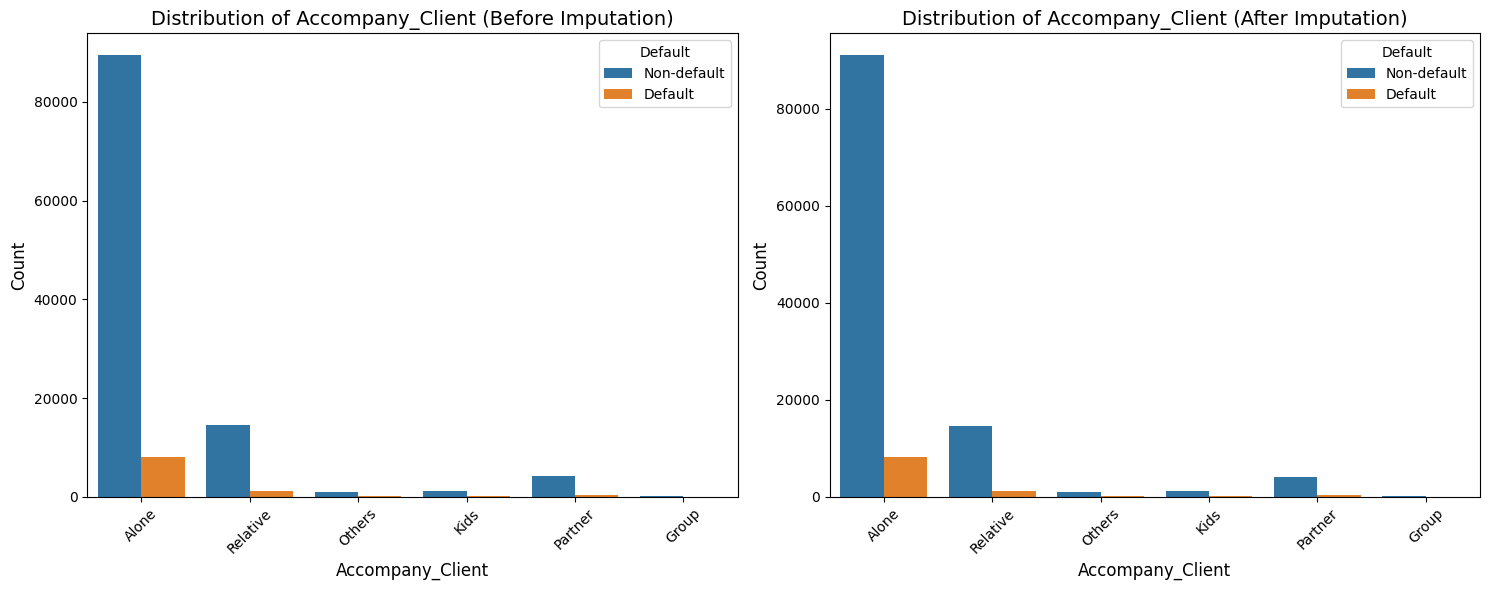

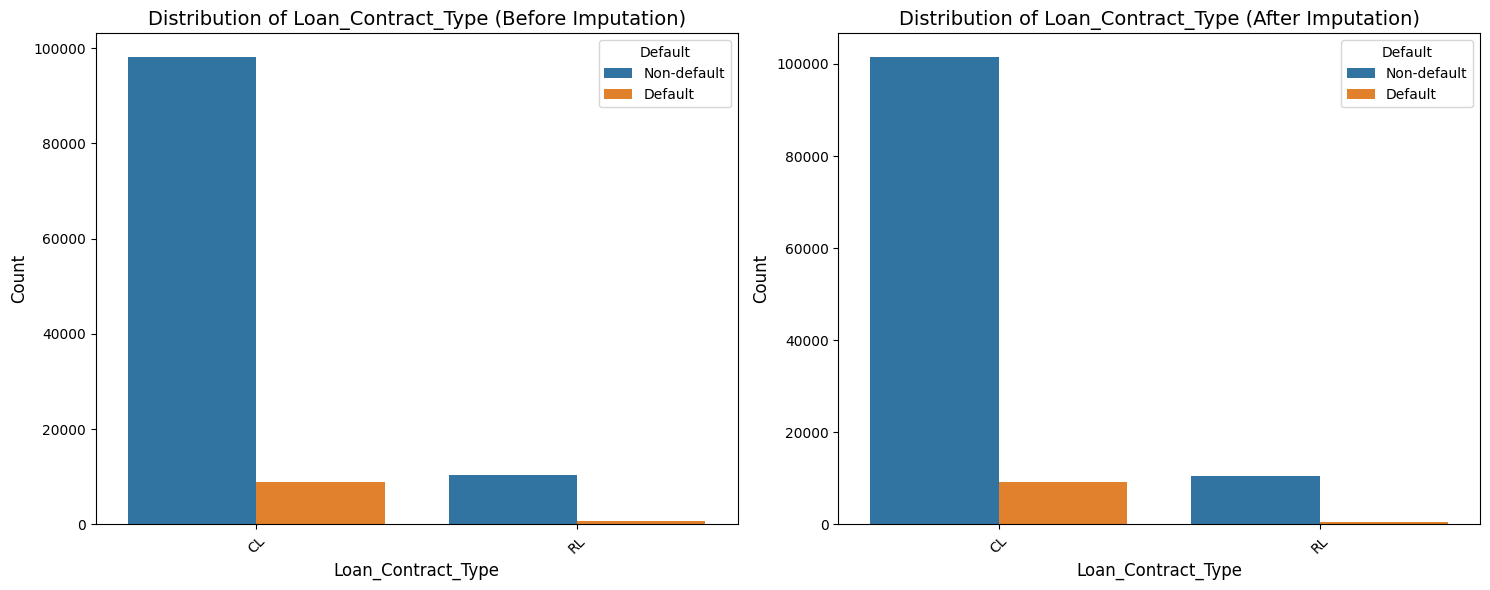

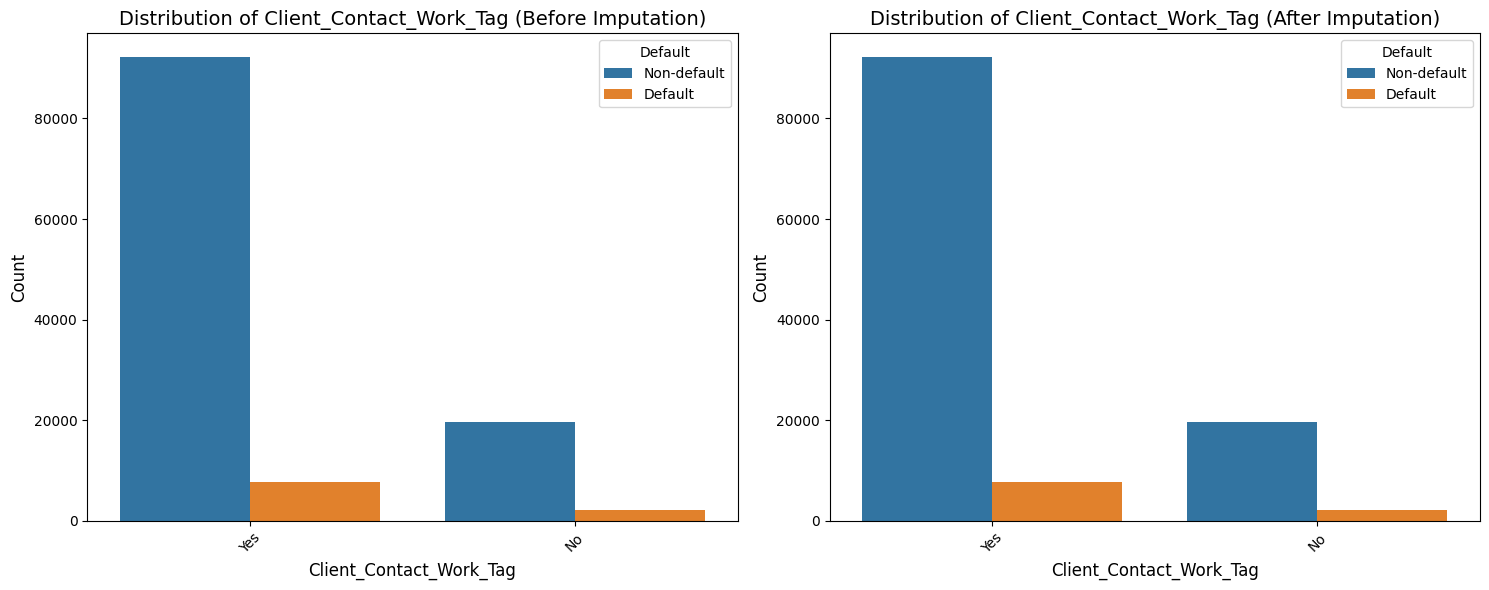

In [18]:
for col in column_cat_less_10:
    plt.figure(figsize=(15, 6))
     
    plt.subplot(1, 2, 1) 
    sns.countplot(data=input_data, x=col, hue='Default')
    plt.title(f'Distribution of {col} (Before Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45) 
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.subplot(1, 2, 2)  
    sns.countplot(data=imputed_data, x=col, hue='Default')
    plt.title(f'Distribution of {col} (After Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.tight_layout()
    plt.show()

## For Numerical Columns 

In [32]:
column_num_less_10=list(set(less_missing_data_col)&set(numerical_cols))

num_imputer_mode = SimpleImputer(strategy='median') 
imputed_data[column_num_less_10] = num_imputer_mode.fit_transform(imputed_data[column_num_less_10])

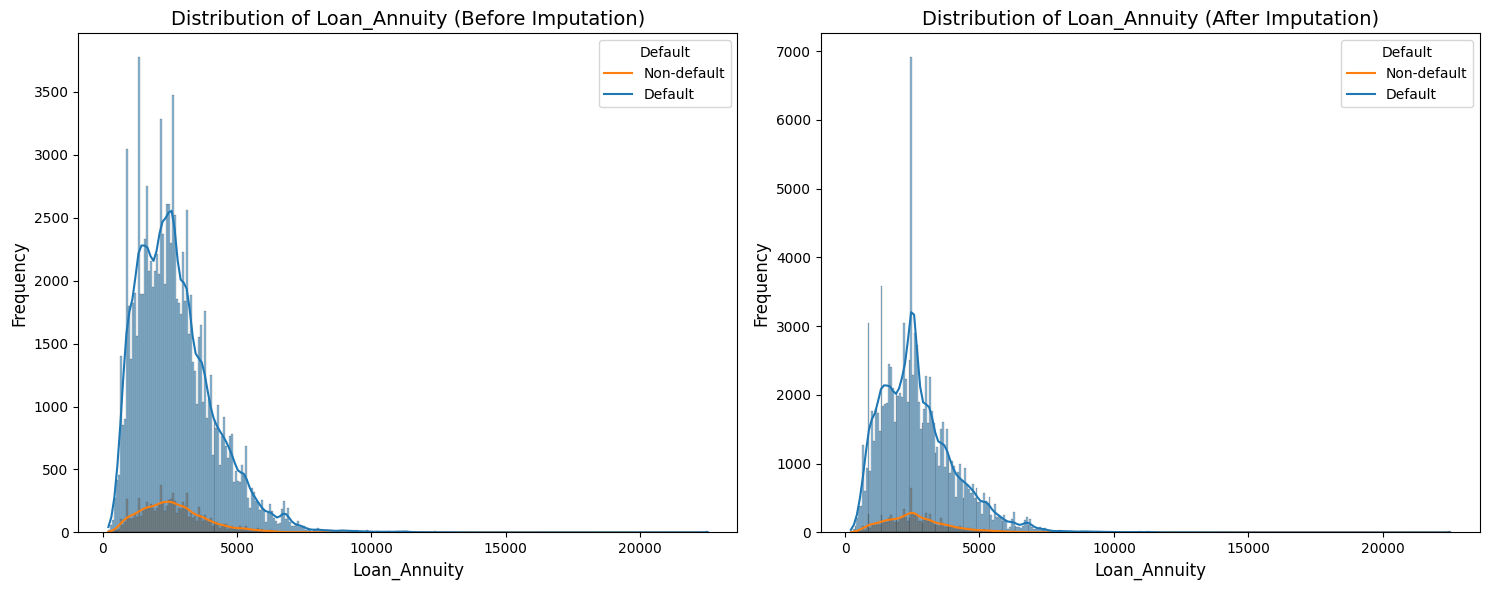

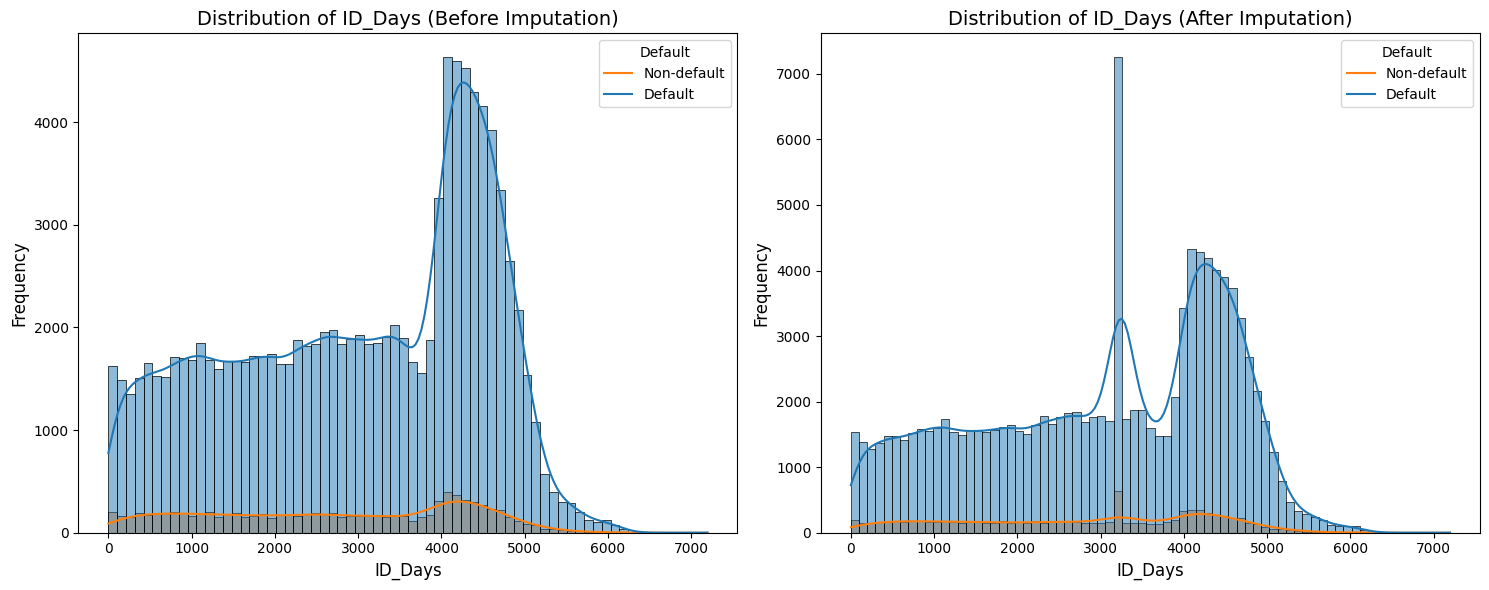

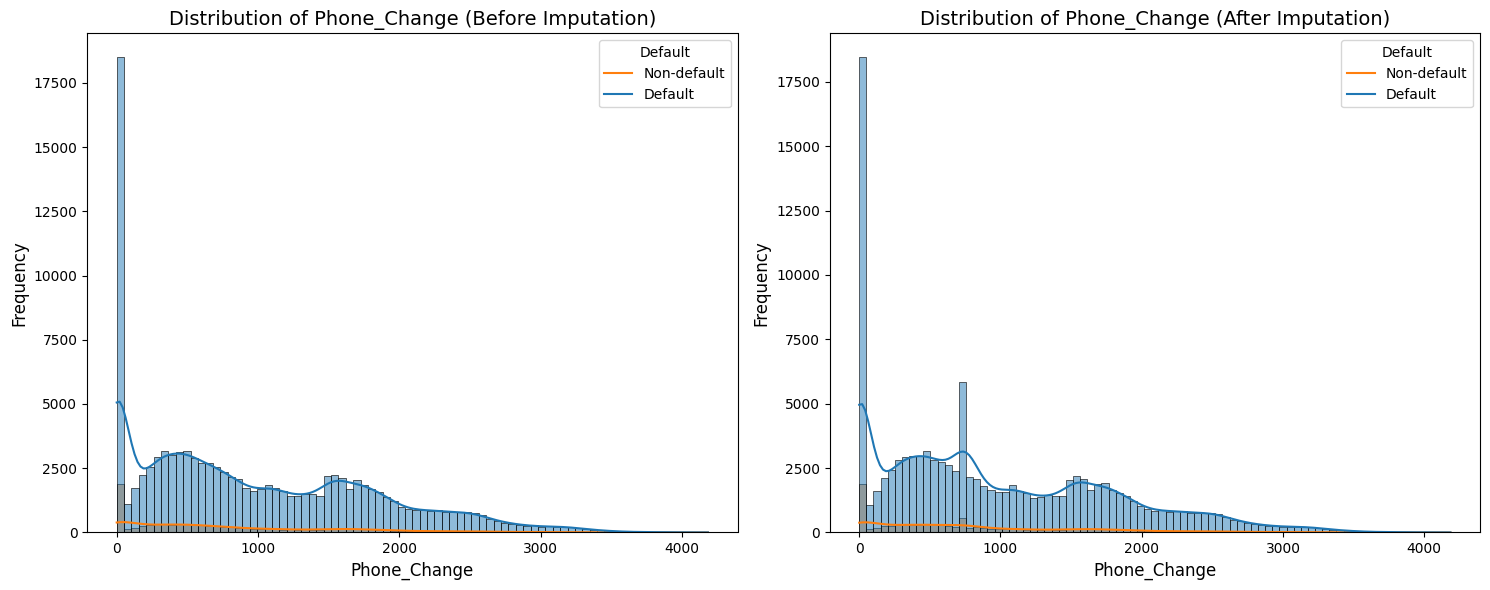

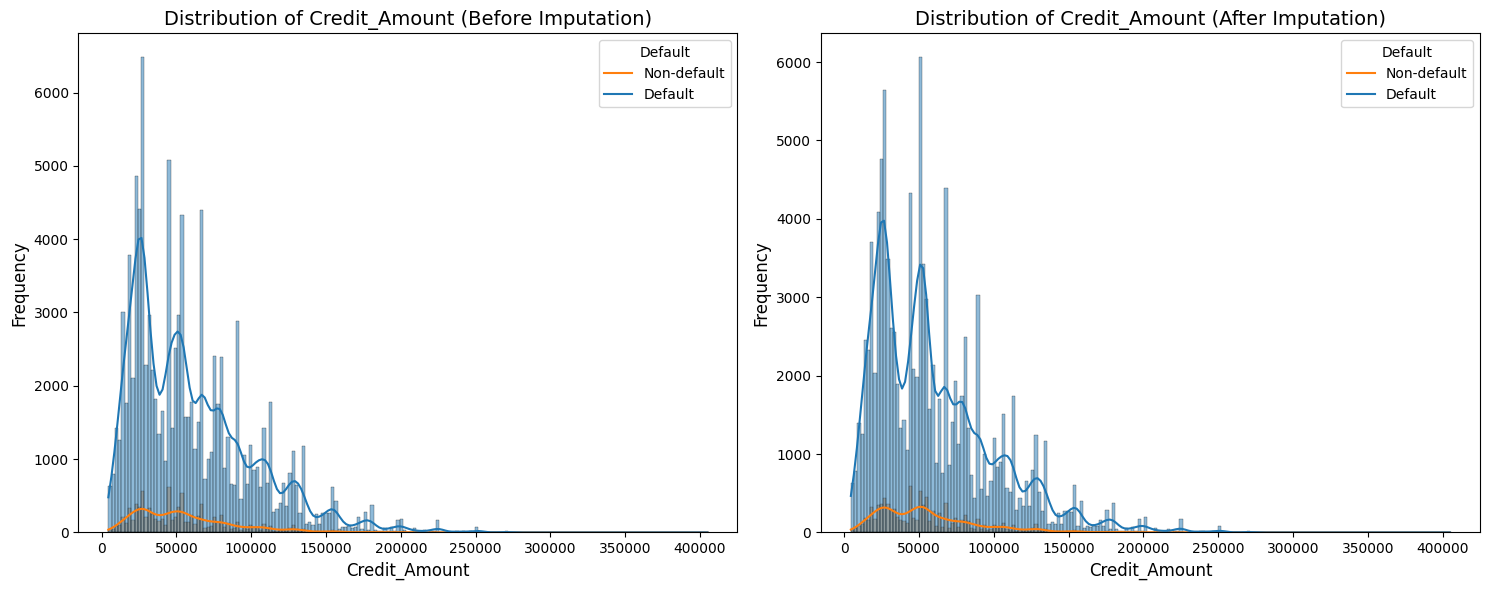

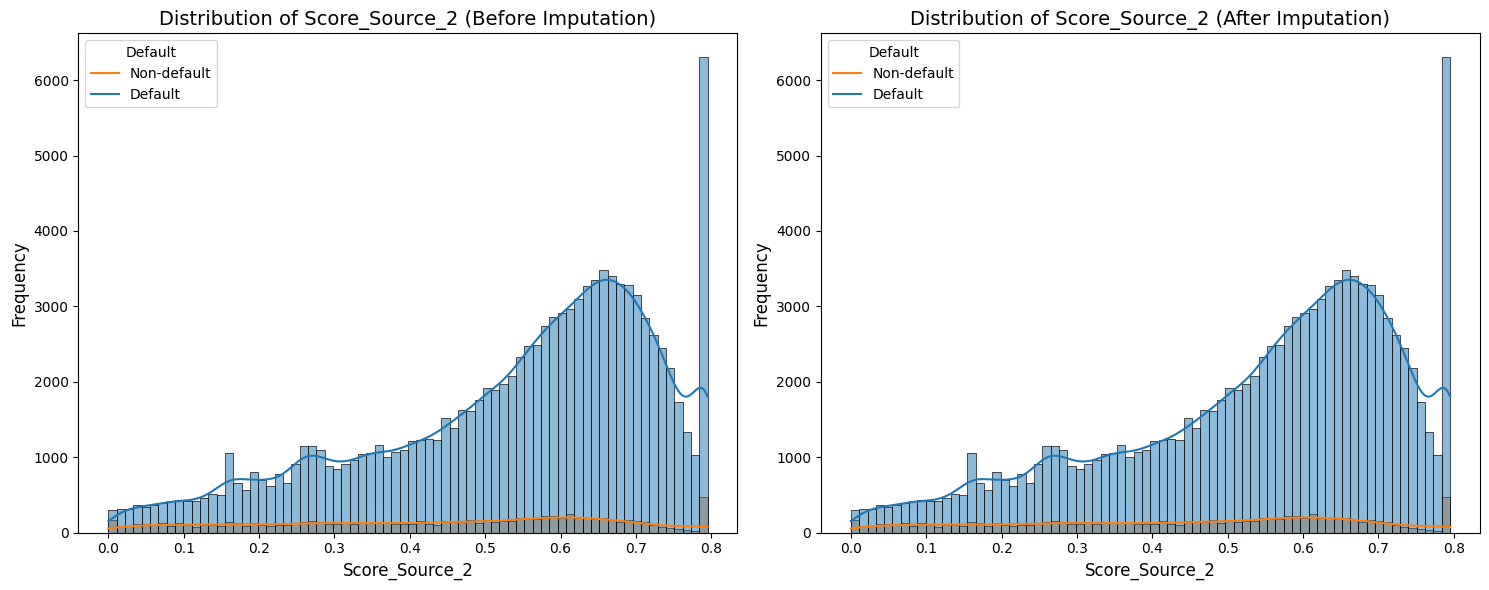

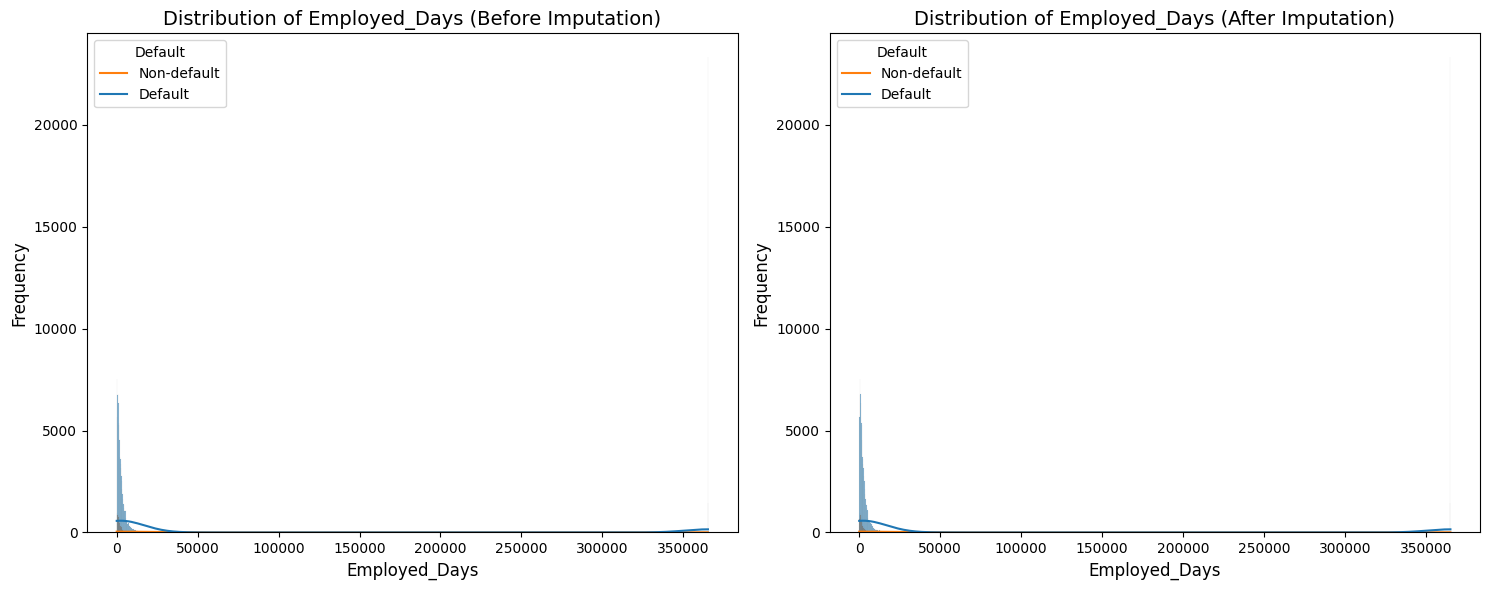

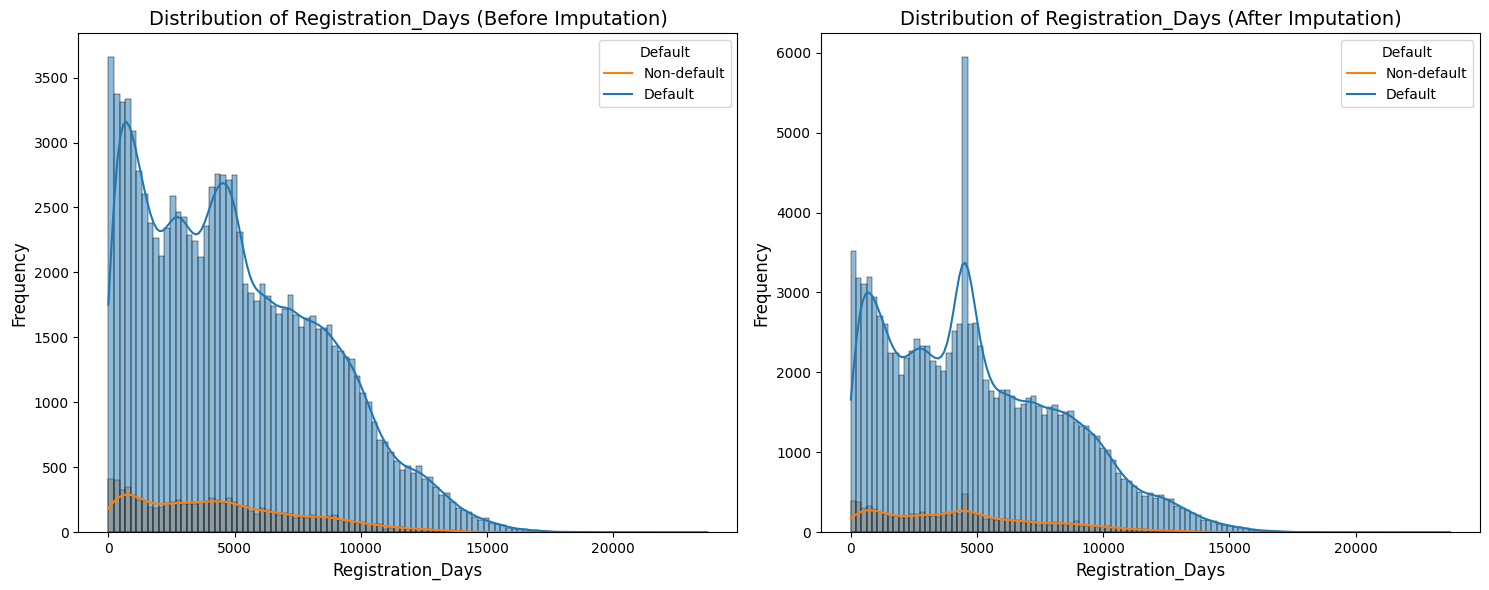

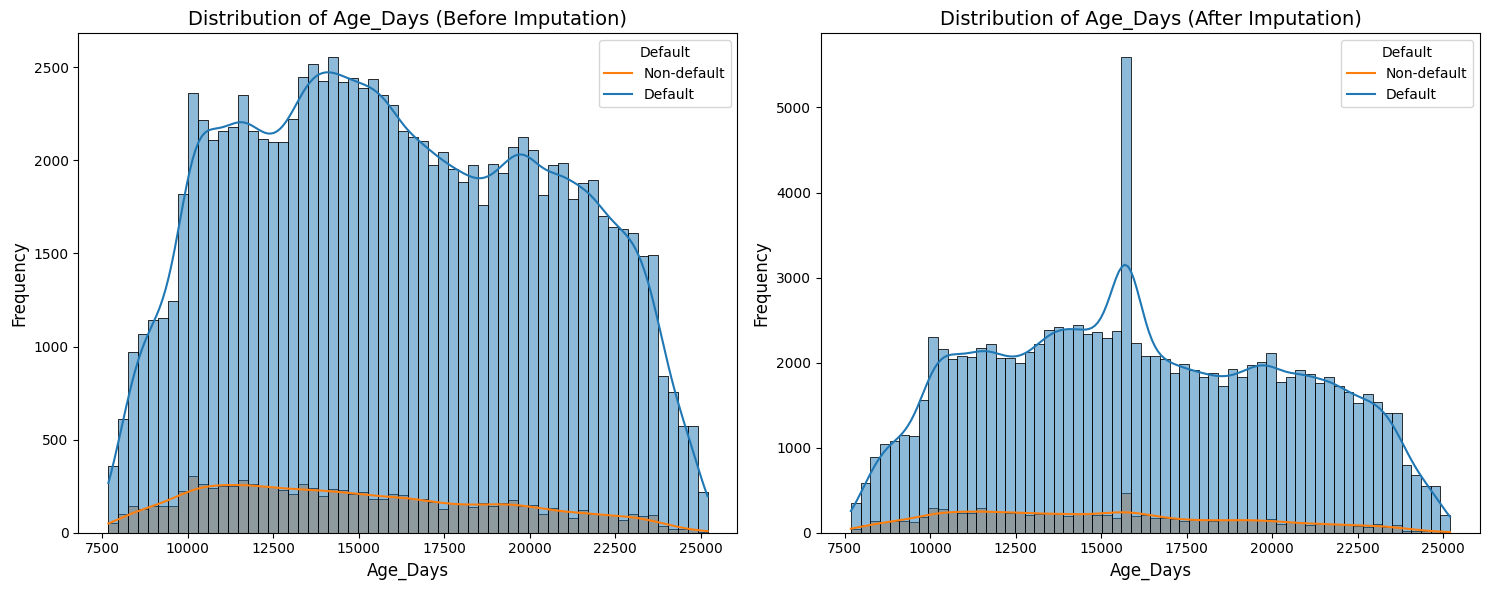

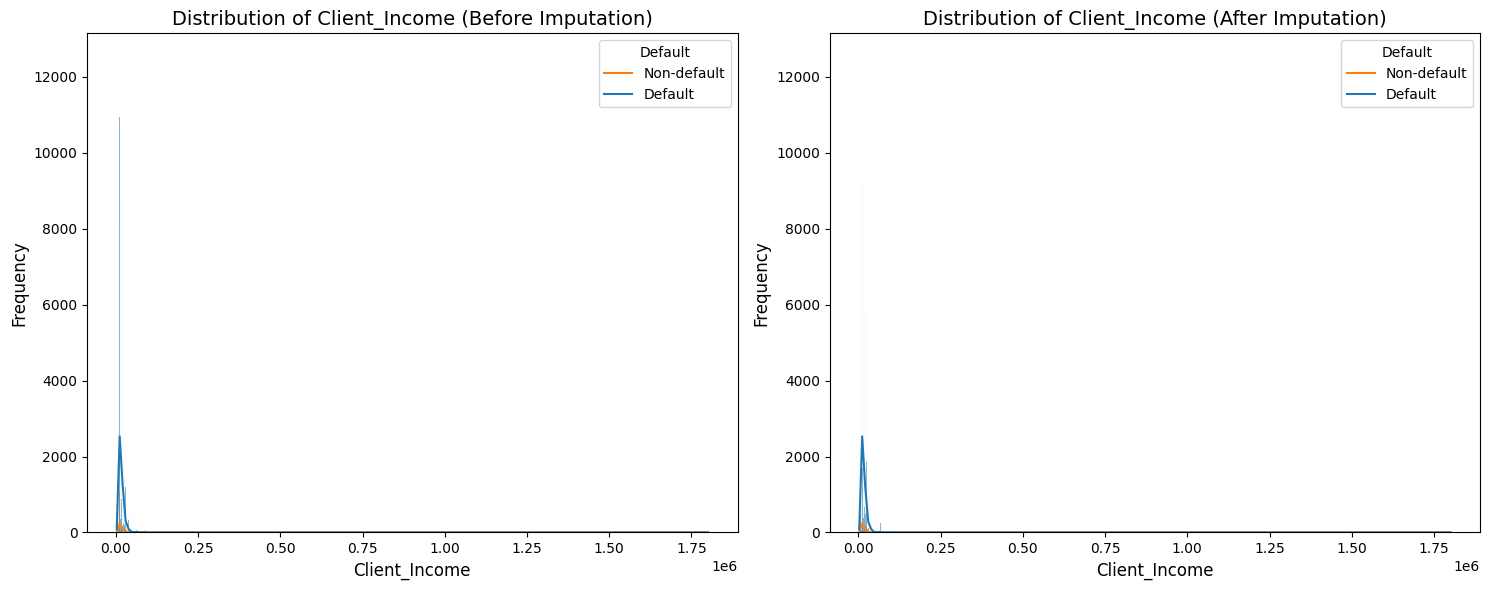

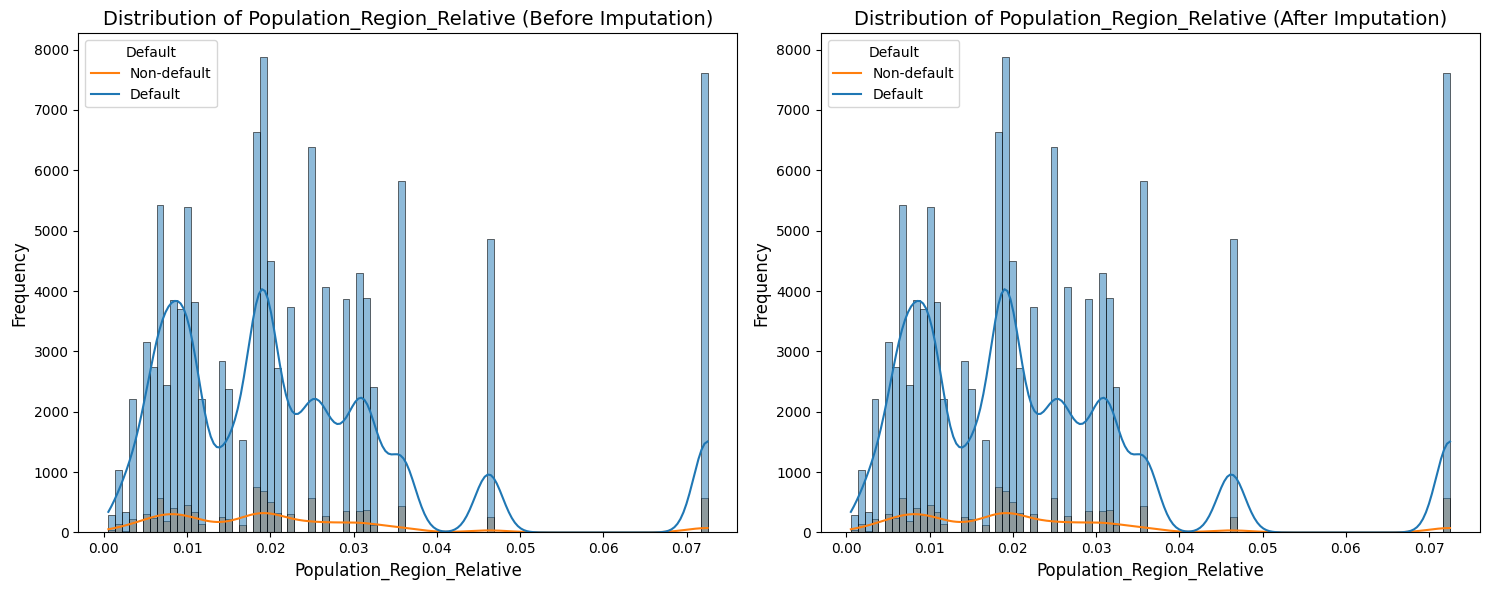

In [33]:
for col in column_num_less_10:
    plt.figure(figsize=(15, 6)) 
    
    plt.subplot(1, 2, 1)  
    sns.histplot(data=input_data, x=col, hue='Default', kde=True)
    plt.title(f'Distribution of {col} (Before Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.subplot(1, 2, 2)  
    sns.histplot(data=imputed_data, x=col, hue='Default', kde=True)
    plt.title(f'Distribution of {col} (After Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.tight_layout()
    plt.show()

# Columns with Missing Values >10%

### For Numerical Colums

In [34]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data[numerical_cols] = knn_imputer.fit_transform(imputed_data[numerical_cols])

In [37]:
column_num_higher_10=list(set(majority_missing_data_col)&set(numerical_cols))
column_num_higher_10

['Score_Source_1', 'Score_Source_3', 'Social_Circle_Default']

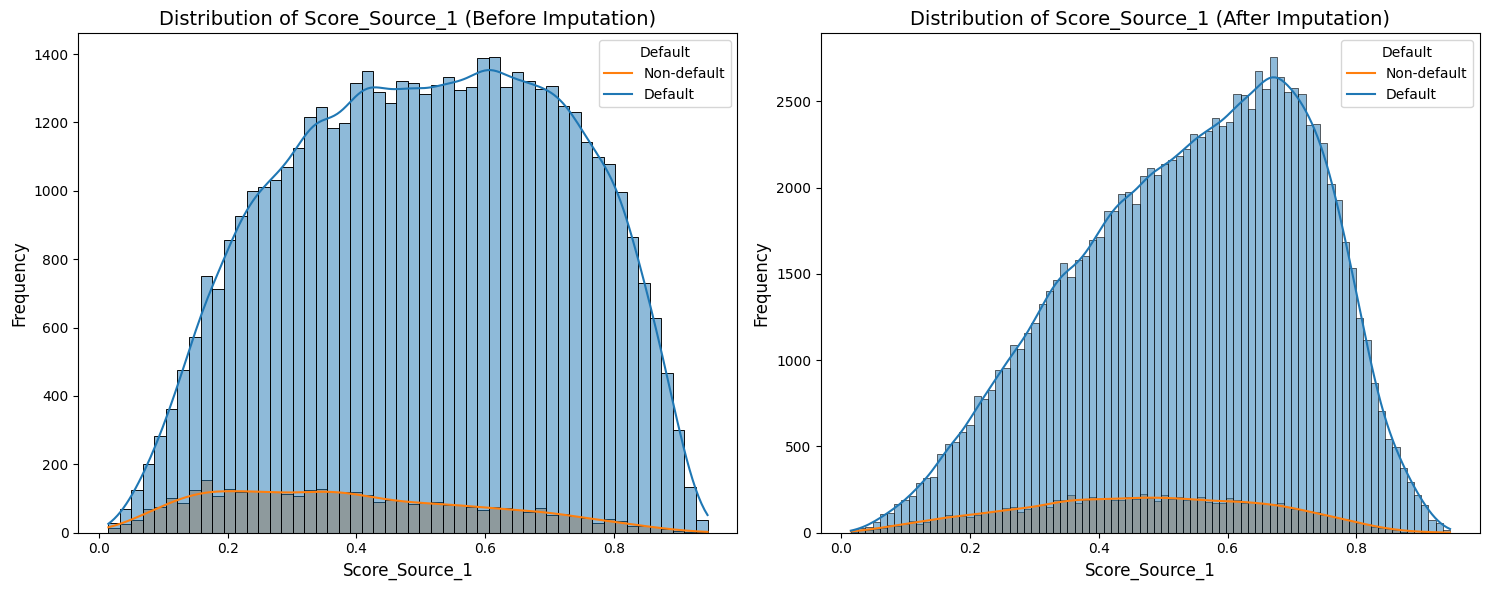

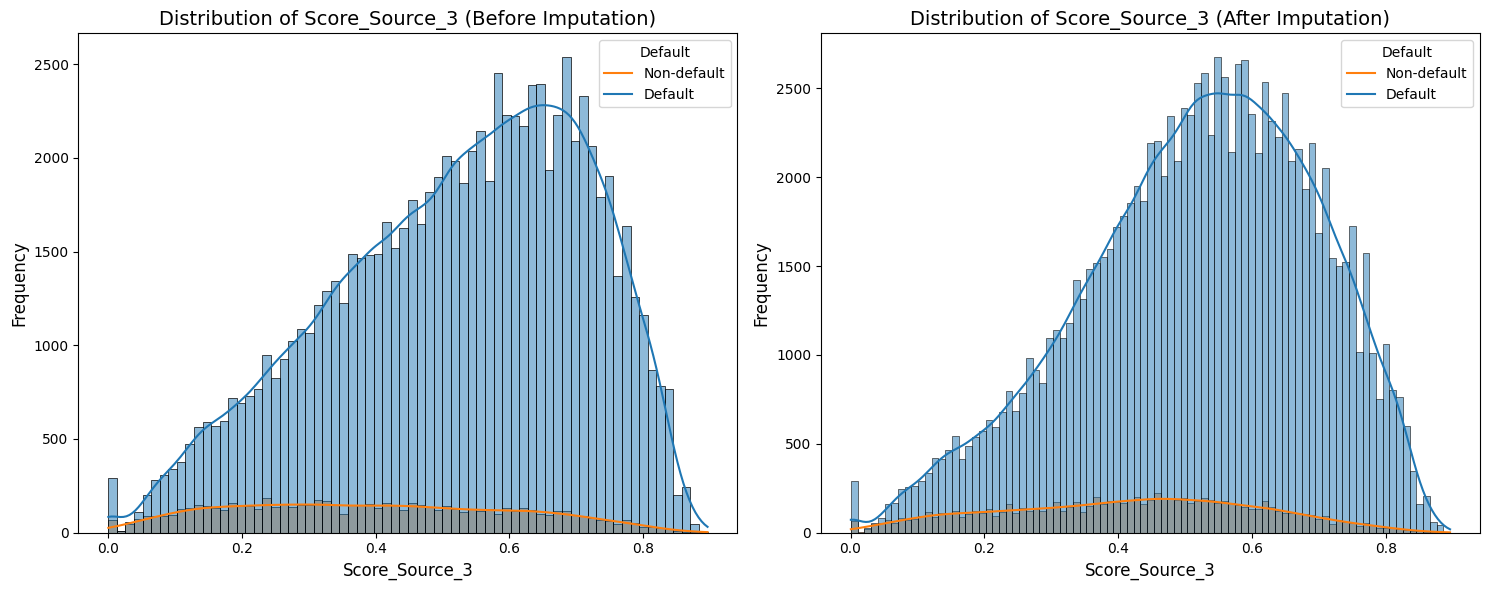

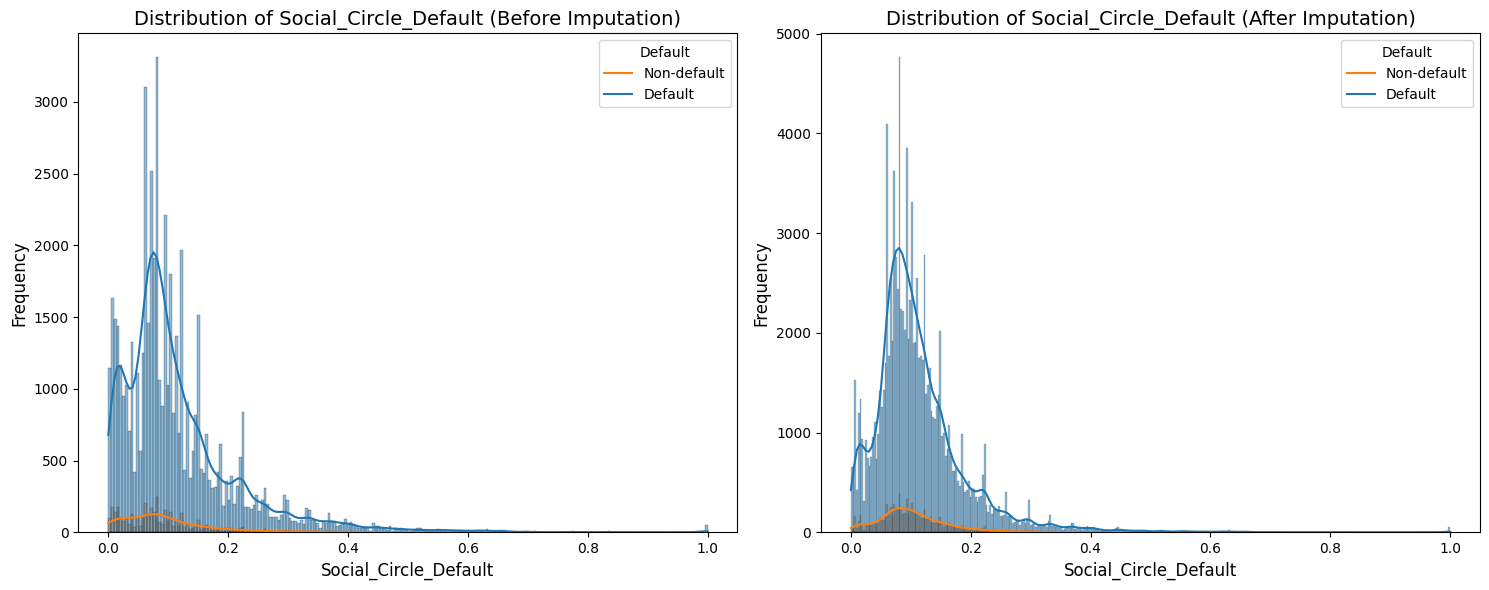

In [35]:
for col in column_num_higher_10:
    plt.figure(figsize=(15, 6)) 
    
    plt.subplot(1, 2, 1)  
    sns.histplot(data=input_data, x=col, hue='Default', kde=True)
    plt.title(f'Distribution of {col} (Before Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.subplot(1, 2, 2)  
    sns.histplot(data=imputed_data, x=col, hue='Default', kde=True)
    plt.title(f'Distribution of {col} (After Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.tight_layout()
    plt.show()

## For Categorical Colums

In [303]:
imputed_data=pd.read_csv("./imputed_data.csv")
# x.isna().sum()

In [304]:
# % of missing values are very high in remaining Columns so have to train ML model to predict missing Values for each clolumn
column_cat_higher_10=list(set(majority_missing_data_col)&set(all_combine_cat_col))

In [305]:
imputed_data["Client_Gender"]=imputed_data["Client_Gender"].map({"Female":0,"Male":1,"XNA":0})
imputed_data["Client_Education"]=imputed_data["Client_Education"].map({"Junior secondary":0,"Secondary":1,"Graduation dropout":2,
                                                                      "Graduation":3,"Post Grad":4})

In [306]:
processed_imputed_data=imputed_data.copy()
one_hot_encoding_col=["Accompany_Client", "Client_Income_Type", "Client_Marital_Status", "Loan_Contract_Type", "Client_Housing_Type",
"Mobile_Tag", "Homephone_Tag", "Workphone_Working", "Client_Family_Members", "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour",
"Client_Permanent_Match_Tag","Client_Contact_Work_Tag"]
processed_imputed_data = pd.get_dummies(processed_imputed_data, columns=one_hot_encoding_col)

In [307]:
column_cat_higher_10

['Credit_Bureau', 'Client_Occupation', 'Type_Organization', 'Own_House_Age']

### Credit_Bureau

In [311]:
not_null_columns=list(set(processed_imputed_data.columns)-set(column_cat_higher_10))
not_null_columns.remove("ID")
not_null_columns.remove("Default")
not_null_columns.append("Credit_Bureau")

In [312]:
Credit_Bureau_data=processed_imputed_data[not_null_columns]

In [313]:
Credit_Bureau_data_train=Credit_Bureau_data[Credit_Bureau_data["Credit_Bureau"].notna()]
Credit_Bureau_data_X_train=Credit_Bureau_data_train.drop(columns=["Credit_Bureau"])
Credit_Bureau_data_y_train=Credit_Bureau_data_train["Credit_Bureau"]
Credit_Bureau_data_test=Credit_Bureau_data[Credit_Bureau_data["Credit_Bureau"].isna()]
Credit_Bureau_data_X_test=Credit_Bureau_data_test.drop(columns=["Credit_Bureau"])

In [165]:
Credit_Bureau_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
Credit_Bureau_rf_model.fit(Credit_Bureau_data_X_train, Credit_Bureau_data_y_train)

RandomForestClassifier(random_state=42)

In [314]:
Credit_Bureau_data_Y_Pred = Credit_Bureau_rf_model.predict(Credit_Bureau_data_X_test)
Credit_Bureau_data_y_test=pd.DataFrame(Credit_Bureau_data_Y_Pred,columns=["Credit_Bureau"])
Credit_Bureau_data_final=pd.concat([Credit_Bureau_data_train[["Credit_Bureau"]],Credit_Bureau_data_y_test])
Credit_Bureau_data_final.reset_index(inplace=True)
imputed_data["Credit_Bureau"]=Credit_Bureau_data_final["Credit_Bureau"]

### Client_Occupation

In [316]:
not_null_columns=list(set(processed_imputed_data.columns)-set(column_cat_higher_10))
not_null_columns.remove("ID")
not_null_columns.remove("Default")
not_null_columns.append("Client_Occupation")

In [317]:
label_encoder = LabelEncoder()
Client_Occupation_data=processed_imputed_data[not_null_columns]
Client_Occupation_data_train=Client_Occupation_data[Client_Occupation_data["Client_Occupation"].notna()]
Client_Occupation_data_train['Client_Occupation'] = label_encoder.fit_transform(Client_Occupation_data_train['Client_Occupation'])
Client_Occupation_data_X_train=Client_Occupation_data_train.drop(columns=["Client_Occupation"])
Client_Occupation_data_y_train=Client_Occupation_data_train["Client_Occupation"]
Client_Occupation_data_test=Client_Occupation_data[Client_Occupation_data["Client_Occupation"].isna()]
Client_Occupation_data_X_test=Client_Occupation_data_test.drop(columns=["Client_Occupation"])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_32008\2194455244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Client_Occupation_data_train['Client_Occupation'] = label_encoder.fit_transform(Client_Occupation_data_train['Client_Occupation'])


In [300]:
Client_Occupation_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
Client_Occupation_rf_model.fit(Client_Occupation_data_X_train, Client_Occupation_data_y_train)

RandomForestClassifier(random_state=42)

In [319]:
Client_Occupation_data_Y_Pred = Client_Occupation_rf_model.predict(Client_Occupation_data_X_test)
Client_Occupation_data_y_test=pd.DataFrame(Client_Occupation_data_Y_Pred,columns=["Client_Occupation"])
Client_Occupation_data_final=pd.concat([Client_Occupation_data_train[["Client_Occupation"]],Client_Occupation_data_y_test])
Client_Occupation_data_final.reset_index(inplace=True)
imputed_data["Client_Occupation"]=Client_Occupation_data_final["Client_Occupation"]

## Type_Organization

In [323]:
not_null_columns=list(set(processed_imputed_data.columns)-set(column_cat_higher_10))
not_null_columns.remove("ID")
not_null_columns.remove("Default")
not_null_columns.append("Type_Organization")

In [335]:
label_encoder = LabelEncoder()
Type_Organization_data=processed_imputed_data[not_null_columns]
Type_Organization_data["Type_Organization"]=Type_Organization_data["Type_Organization"].replace("XNA",None)
Type_Organization_data_train=Type_Organization_data[Type_Organization_data["Type_Organization"].notna()]
Type_Organization_data_train['Type_Organization'] = label_encoder.fit_transform(Type_Organization_data_train['Type_Organization'])
Type_Organization_data_X_train=Type_Organization_data_train.drop(columns=["Type_Organization"])
Type_Organization_data_y_train=Type_Organization_data_train["Type_Organization"]
Type_Organization_data_test=Type_Organization_data[Type_Organization_data["Type_Organization"].isna()]
Type_Organization_data_X_test=Type_Organization_data_test.drop(columns=["Type_Organization"])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_32008\424921514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Type_Organization_data["Type_Organization"]=Type_Organization_data["Type_Organization"].replace("XNA",None)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_32008\424921514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Type_Organization_data_train['Type_Organization'] = label_encoder.fit_transform(Type_Organization_data_train['Type_Organization'])


In [339]:
Type_Organization_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
Type_Organization_rf_model.fit(Type_Organization_data_X_train, Type_Organization_data_y_train)

RandomForestClassifier(random_state=42)

In [340]:
Type_Organization_data_Y_Pred = Type_Organization_rf_model.predict(Type_Organization_data_X_test)
Type_Organization_data_y_test=pd.DataFrame(Type_Organization_data_Y_Pred,columns=["Type_Organization"])
Type_Organization_data_final=pd.concat([Type_Organization_data_train[["Type_Organization"]],Type_Organization_data_y_test])
Type_Organization_data_final.reset_index(inplace=True)
imputed_data["Type_Organization"]=Type_Organization_data_final["Type_Organization"]

## Own_House_Age

In [345]:
not_null_columns=list(set(processed_imputed_data.columns)-set(column_cat_higher_10))
not_null_columns.remove("ID")
not_null_columns.remove("Default")
not_null_columns.append("Own_House_Age")

In [346]:
label_encoder = LabelEncoder()
Own_House_Age_data=processed_imputed_data[not_null_columns]
Own_House_Age_data_train=Own_House_Age_data[Own_House_Age_data["Own_House_Age"].notna()]
Own_House_Age_data_train['Own_House_Age'] = label_encoder.fit_transform(Own_House_Age_data_train['Own_House_Age'])
Own_House_Age_data_X_train=Own_House_Age_data_train.drop(columns=["Own_House_Age"])
Own_House_Age_data_y_train=Own_House_Age_data_train["Own_House_Age"]
Own_House_Age_data_test=Own_House_Age_data[Own_House_Age_data["Own_House_Age"].isna()]
Own_House_Age_data_X_test=Own_House_Age_data_test.drop(columns=["Own_House_Age"])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_32008\2877085721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Own_House_Age_data_train['Own_House_Age'] = label_encoder.fit_transform(Own_House_Age_data_train['Own_House_Age'])


In [347]:
Own_House_Age_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
Own_House_Age_rf_model.fit(Own_House_Age_data_X_train, Own_House_Age_data_y_train)

RandomForestClassifier(random_state=42)

In [348]:
Own_House_Age_data_Y_Pred = Own_House_Age_rf_model.predict(Own_House_Age_data_X_test)
Own_House_Age_data_y_test=pd.DataFrame(Own_House_Age_data_Y_Pred,columns=["Own_House_Age"])
Own_House_Age_data_final=pd.concat([Own_House_Age_data_train[["Own_House_Age"]],Own_House_Age_data_y_test])
Own_House_Age_data_final.reset_index(inplace=True)
imputed_data["Own_House_Age"]=Own_House_Age_data_final["Own_House_Age"]

In [350]:
temp_input_data=input_data.copy()
temp_input_data["Type_Organization"]=temp_input_data["Type_Organization"].replace("XNA",None)
temp_input_data['Type_Organization'] = label_encoder.fit_transform(temp_input_data['Type_Organization'])
temp_input_data['Client_Occupation'] = label_encoder.fit_transform(temp_input_data['Client_Occupation'])

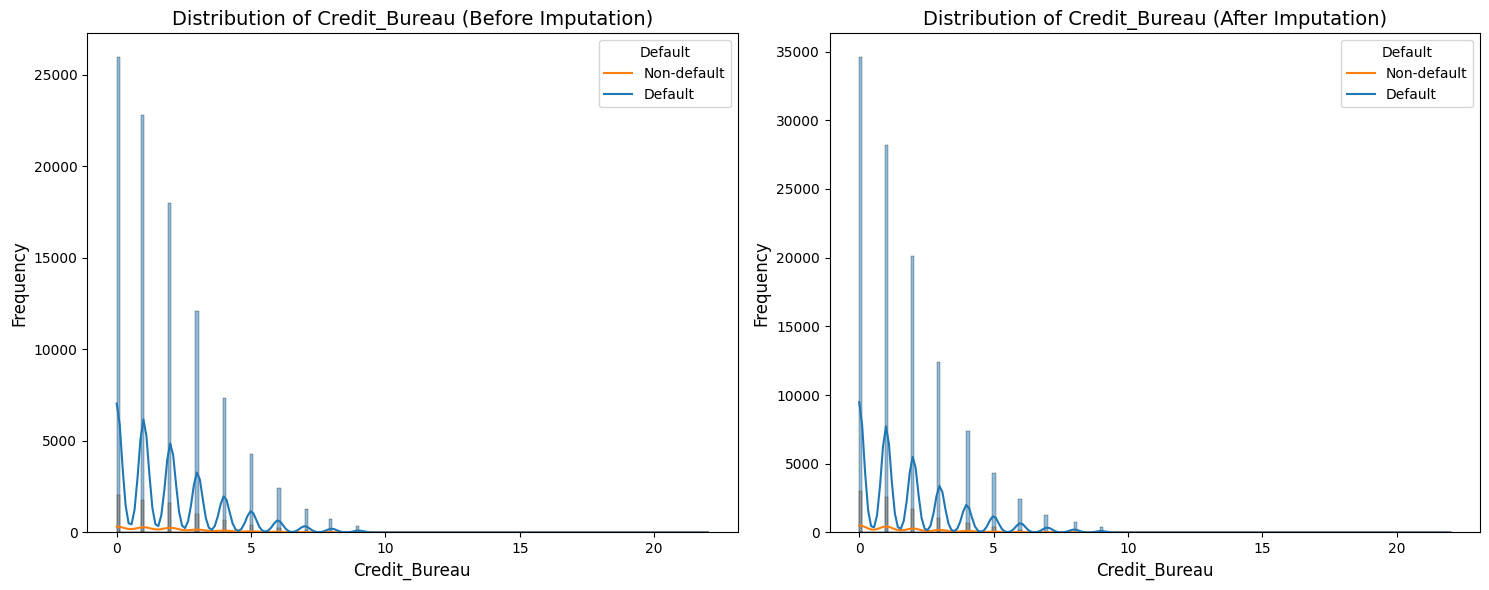

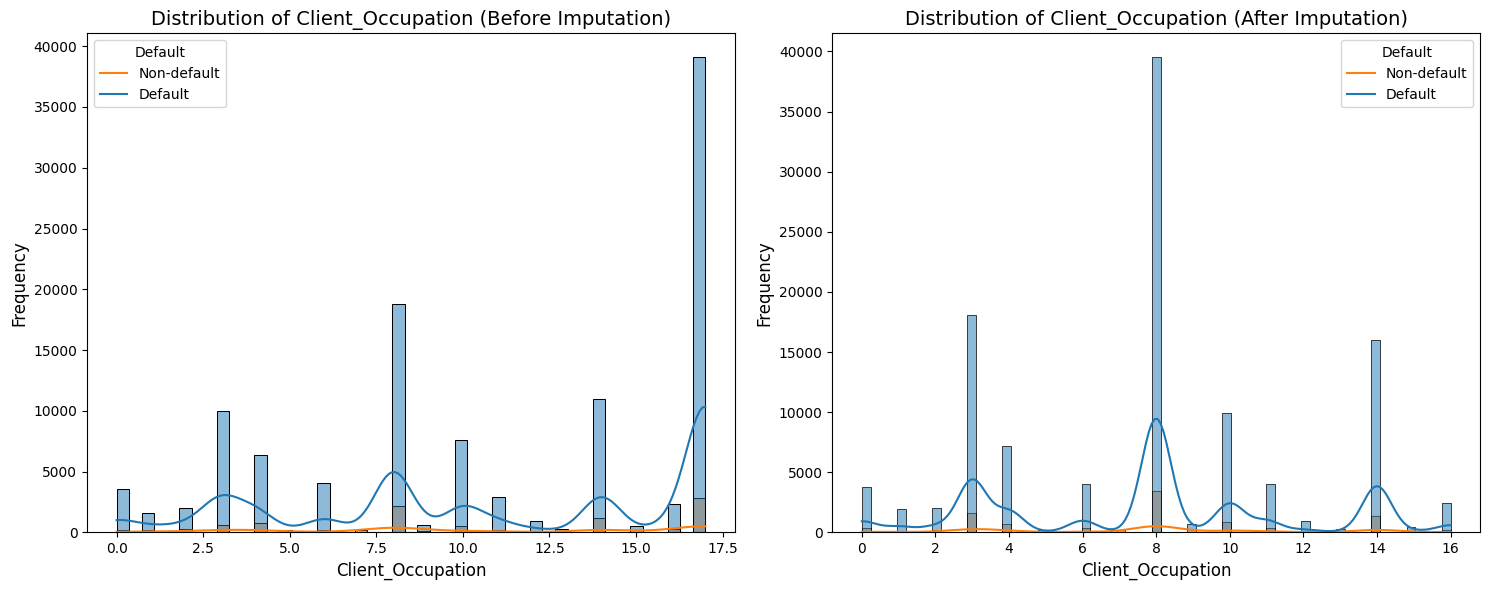

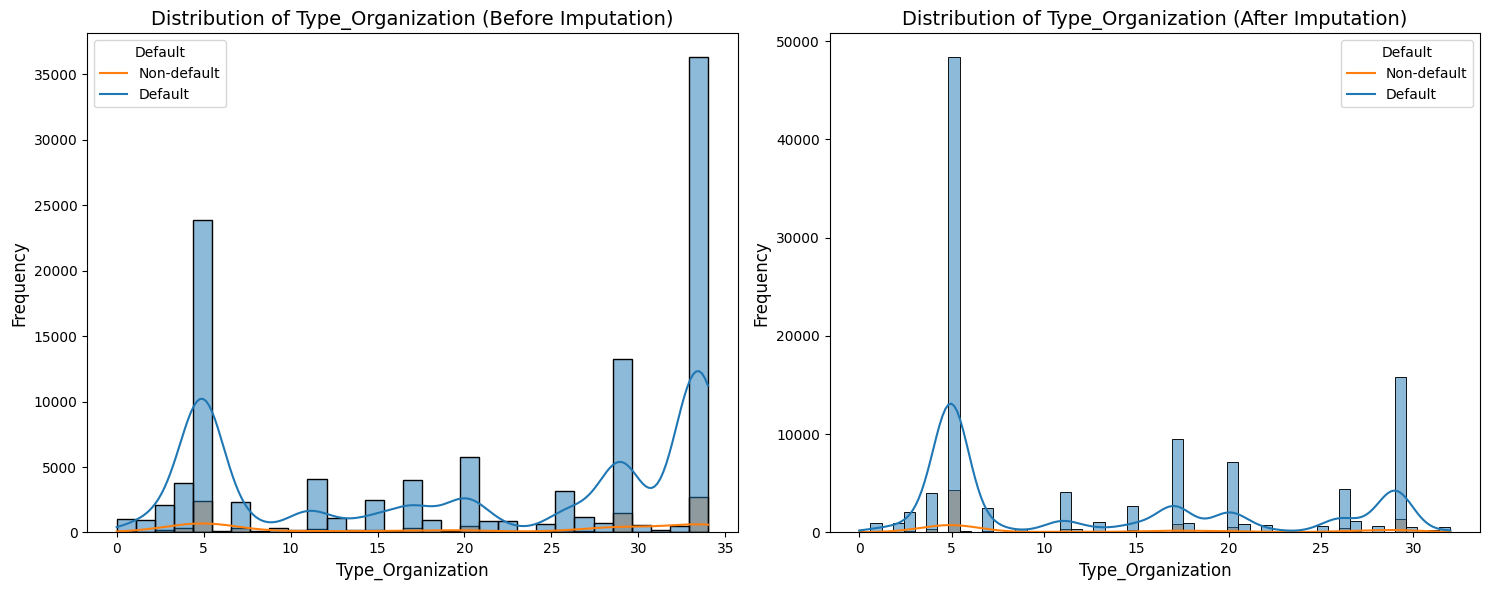

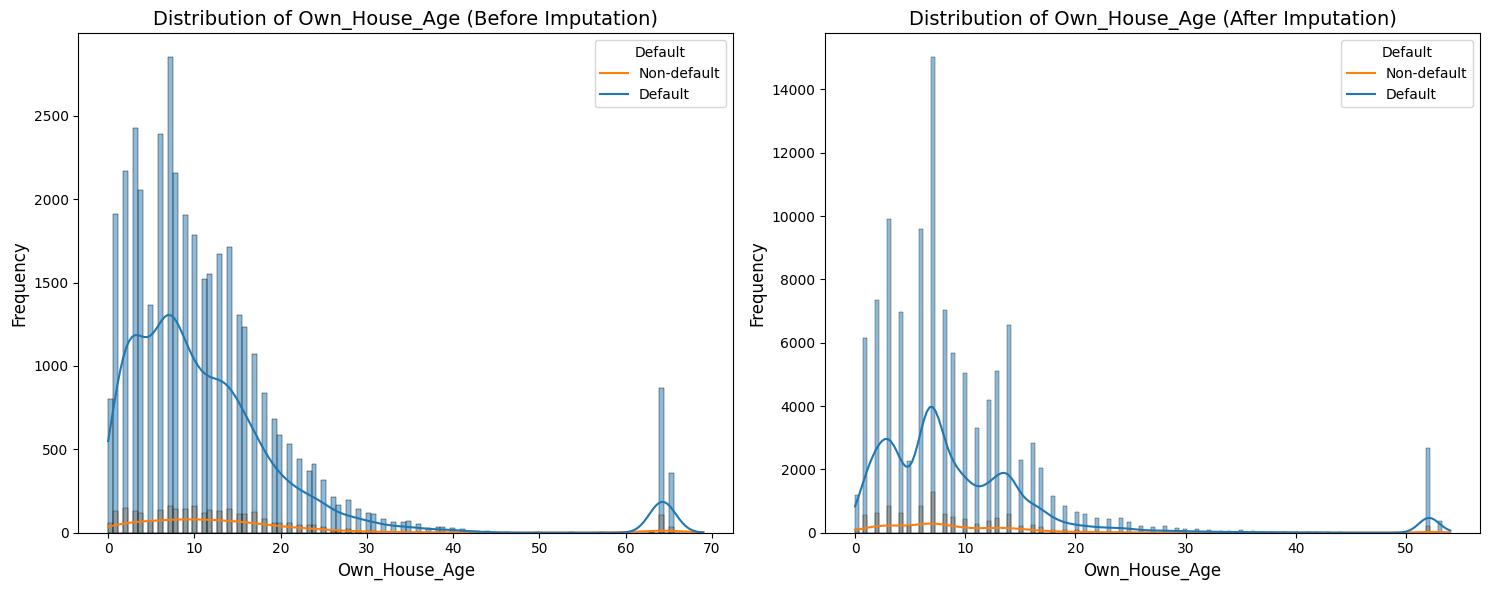

In [351]:
for col in column_cat_higher_10:
    plt.figure(figsize=(15, 6)) 
    
    plt.subplot(1, 2, 1)  
    sns.histplot(data=temp_input_data, x=col, hue='Default', kde=True)
    plt.title(f'Distribution of {col} (Before Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.subplot(1, 2, 2)  
    sns.histplot(data=imputed_data, x=col, hue='Default', kde=True)
    plt.title(f'Distribution of {col} (After Imputation)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Default', labels=['Non-default', 'Default'])
    
    plt.tight_layout()
    plt.show()

# Pre-Processing : Data Cleaning, Outlier and Missing Value.....Done

##############################################################################################################################

# Model Training

In [548]:
# imputed_data=pd.read_csv("./Imputed_Cleaned_Missing_Value_Filled_Data.csv")
imputed_data.drop("ID",axis=1,inplace=True)
for column in list(imputed_data.columns)[:len(list(imputed_data.columns))-1]:
    le = LabelEncoder()
    imputed_data[column] = le.fit_transform(imputed_data[column])

In [549]:
imputed_data.head(2)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,182,0,0,1,0,0,1656,6057,0,1,...,1,1,29,55508,26889,18238,126,63,0,0
1,829,1,0,1,1,0,242,2784,0,5,...,1,1,11,54596,8468,21619,7775,755,3,0


## OverSample Minority Class

In [550]:
smote = SMOTE()
upsample_X_imputed,upsample_Y_imputed=imputed_data.drop("Default",axis=1),imputed_data["Default"]

X_imputed, Y_imputed = smote.fit_resample(upsample_X_imputed, upsample_Y_imputed)
X_train,X_test,Y_train,Y_test=train_test_split(X_imputed,
                                               Y_imputed,test_size=0.20,random_state=40,stratify=Y_imputed)

### Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     22403
           1       0.85      0.88      0.86     22402

    accuracy                           0.86     44805
   macro avg       0.86      0.86      0.86     44805
weighted avg       0.86      0.86      0.86     44805



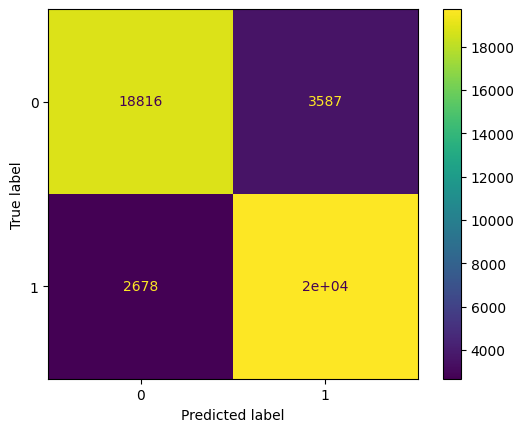

In [551]:
DT_model = DecisionTreeClassifier(class_weight='balanced')
DT_model.fit(X_train, Y_train)

Y_prediction=DT_model.predict(X_test)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

AUC for our classifier is: 0.8601723085547035


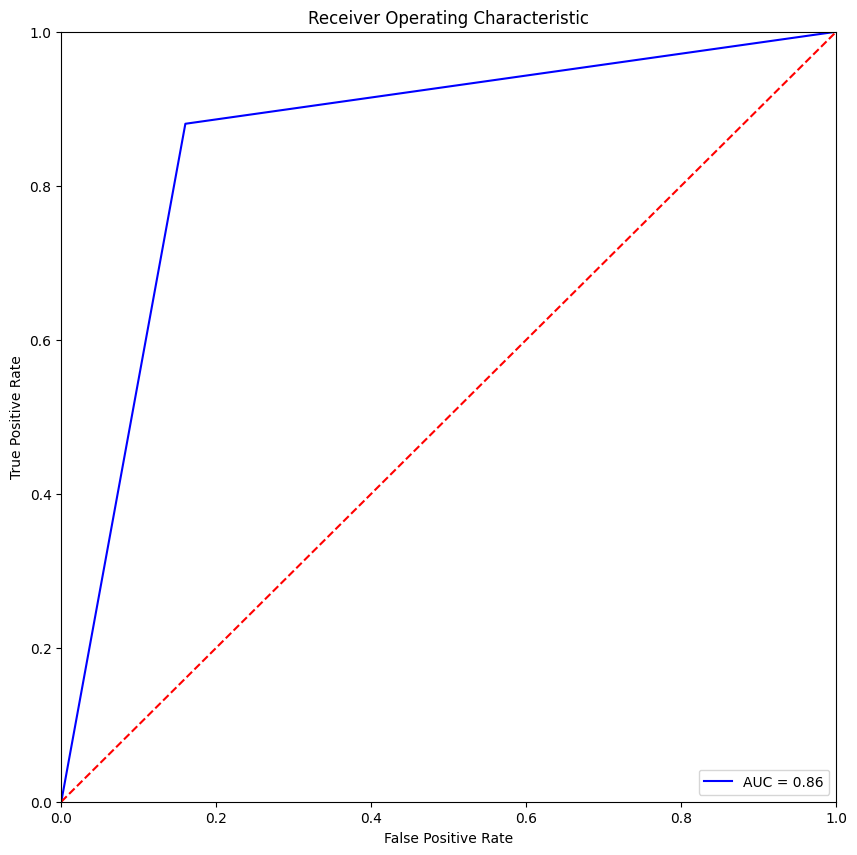

In [558]:
class_probabilities = DT_model.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)
print(f"AUC for our classifier is: {roc_auc}")
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     22403
           1       0.95      0.92      0.94     22402

    accuracy                           0.94     44805
   macro avg       0.94      0.94      0.94     44805
weighted avg       0.94      0.94      0.94     44805



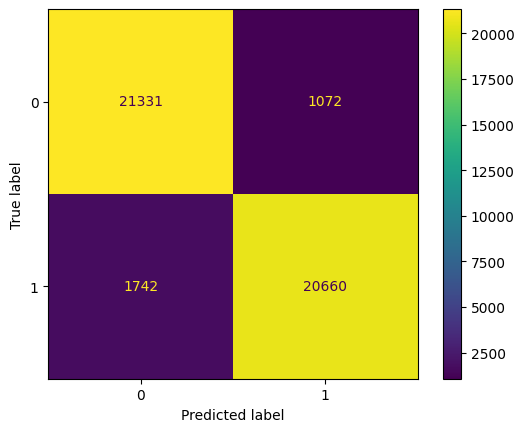

In [559]:
RF_model = RandomForestClassifier(class_weight='balanced')
RF_model.fit(X_train, Y_train)

Y_prediction=RF_model.predict(X_test)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

AUC for our classifier is: 0.9797923407188405


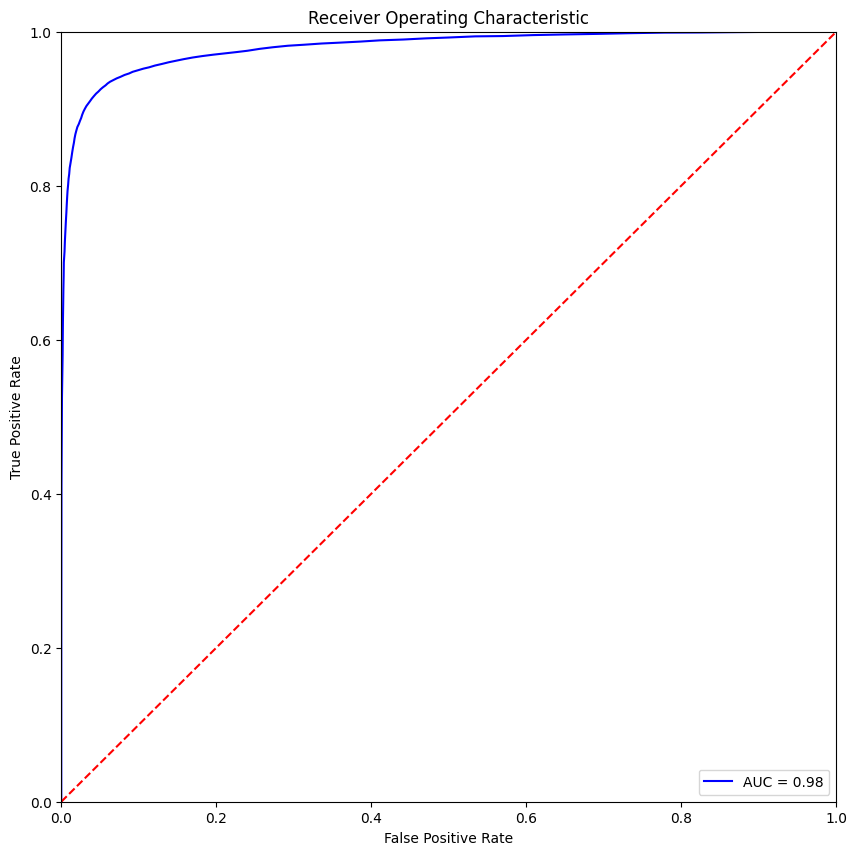

In [560]:
class_probabilities = RF_model.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)
print(f"AUC for our classifier is: {roc_auc}")
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Feature Importance : Random Forest

In [561]:
importances = RF_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                       Feature  Importance
34              Score_Source_3    0.063065
10            Client_Education    0.060650
12               Client_Gender    0.059376
1                    Car_Owned    0.052175
33              Score_Source_2    0.049384
31           Type_Organization    0.044915
23           Workphone_Working    0.039801
36                Phone_Change    0.036653
32              Score_Source_1    0.033126
24           Client_Occupation    0.031697
15  Population_Region_Relative    0.031231
0                Client_Income    0.029823
3                  Active_Loan    0.029601
6                Credit_Amount    0.029481
2                   Bike_Owned    0.029370
16                    Age_Days    0.029151
19                     ID_Days    0.028911
18           Registration_Days    0.027679
35       Social_Circle_Default    0.027206
17               Employed_Days    0.027193
7                 Loan_Annuity    0.026303
8             Accompany_Client    0.021999
27     Appl

## Hyperparameter Tuning (Random Forest Model)

In [562]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 20]}
model = RandomForestClassifier(n_jobs = -1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
pbar = tqdm(total=len(grid_search.param_grid['n_estimators']))
grid_search.fit(X_train, Y_train)
pbar.update(1)
pbar.close()
best_params = grid_search.best_params_

 50%|█████████████████████████████████████████▌                                         | 1/2 [01:40<01:40, 100.92s/it]


In [563]:
best_params

{'n_estimators': 20}

## Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     22403
           1       0.89      0.87      0.88     22402

    accuracy                           0.88     44805
   macro avg       0.88      0.88      0.88     44805
weighted avg       0.88      0.88      0.88     44805



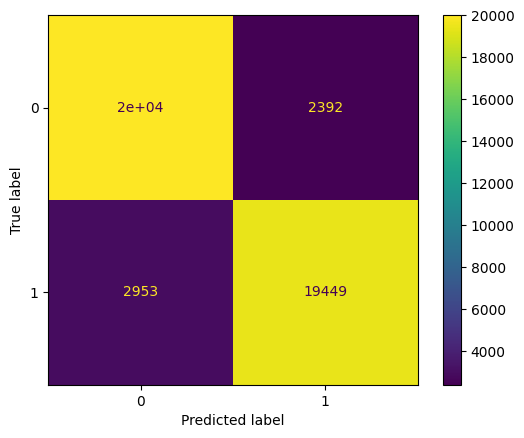

In [569]:
GB_model=GradientBoostingClassifier()
GB_model.fit(X_train, Y_train)

Y_prediction=GB_model.predict(X_test)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

AUC for our classifier is: 0.9443358512409239


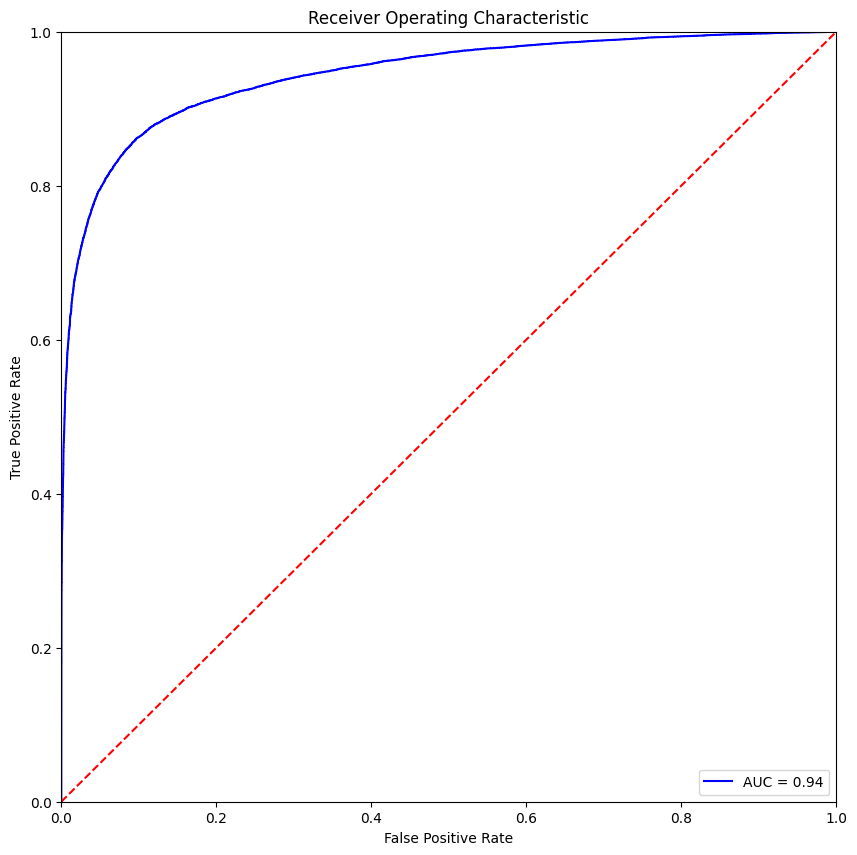

In [570]:
class_probabilities = GB_model.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)
print(f"AUC for our classifier is: {roc_auc}")
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     22403
           1       0.95      0.91      0.93     22402

    accuracy                           0.93     44805
   macro avg       0.93      0.93      0.93     44805
weighted avg       0.93      0.93      0.93     44805



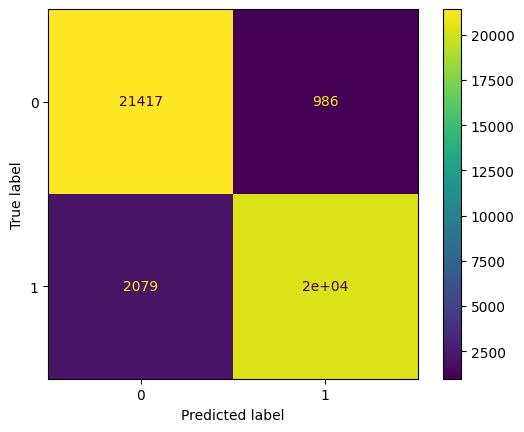

In [573]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

Y_prediction=xgb_classifier.predict(X_test)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

AUC for our classifier is: 0.9729904431051292


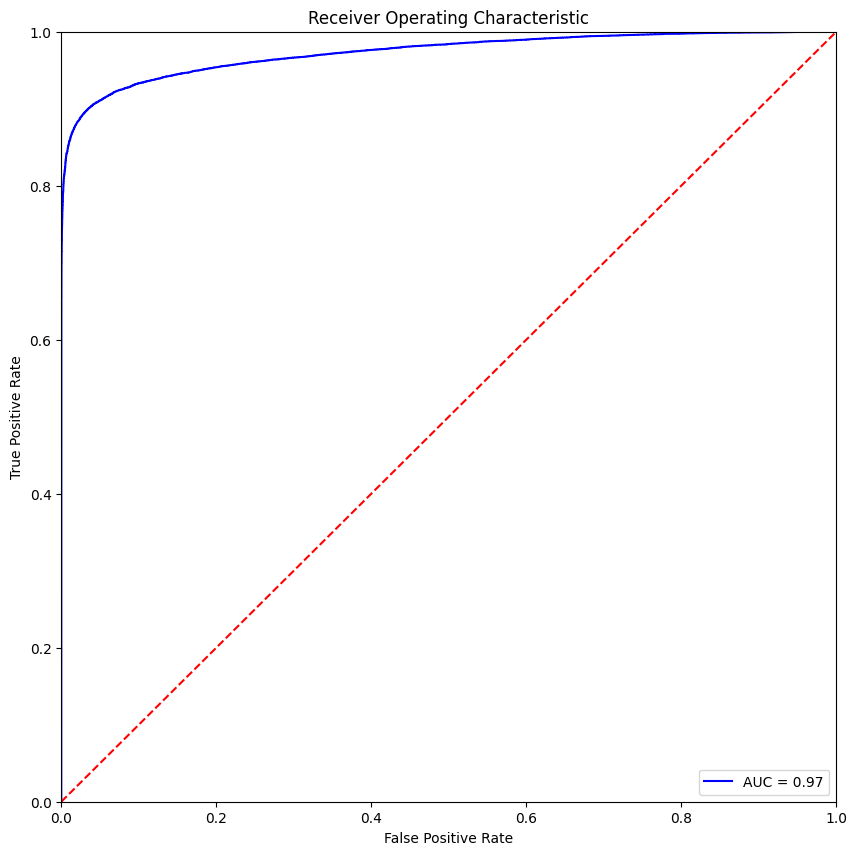

In [574]:
class_probabilities = xgb_classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)
print(f"AUC for our classifier is: {roc_auc}")
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()